# <p style="padding:10px;background-color:#E7B10A;margin:0;color:#141E46;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 10px 20px;overflow:hidden;font-weight:500">BMCS2123 Natural Language Processing Assignment</p>

# <p style="padding:10px;background-color:#EFB495;margin:0;color:#213555;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Natural Language Processing for Sentiment Analysis : Unveiling Customer Voices of Shopee Reviews and Comments</p>

<p style="text-align:center; ">
<img src="https://bigblue.academy/images/image/blog/sentiment-analysis/group-153.jpg" style='width: 600px; height: 350px;'>
</p>

# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Import Libraries & Packages</p>

In [1]:
# pip install nltk

In [2]:
# pip install PySastrawi

In [3]:
# pip install pycountry

In [4]:
# pip install Langdetect

In [5]:
# pip install wordcloud

In [6]:
# pip install demoji

In [7]:
# pip install contractions

In [8]:
# pip install tensorflow

In [9]:
# pip install textblob

In [1]:
import pandas as pd
import nltk
import seaborn as sns #Kenneth
import matplotlib.pyplot as plt
import string
import demoji
import contractions
import time

from langdetect import detect,detect_langs #pip install langdetect (Kenneth)
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")
#nltk.download('wordnet')
#nltk.download('omw-1.4')
#nltk.download('punkt')



# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Import The Dataset</p>

In [2]:
# https://shopee.com.my/-READY-STOCK-BAJU-MELAYU-SLIM-FIT-DEWASA-DAN-BUDAK-(kain-sating)-RAYA-2024-i.310588344.24263963059?sp_atk=287c391c-faaa-41a1-82f2-7256758aae1e&xptdk=287c391c-faaa-41a1-82f2-7256758aae1e
# https://shopee.com.my/SALE-!!!!Baju-Melayu-Slimfit-dan-Regular-Warna-Cream-i.45909008.4503941744?sp_atk=8aaff726-92bd-4a36-a751-26b59408ed33&xptdk=8aaff726-92bd-4a36-a751-26b59408ed33


# Define file paths
data  = "dataset1.csv"
data2 = "dataset2.csv"

# Read CSV files into DataFrames
df1 = pd.read_csv(data)
df2 = pd.read_csv(data2, encoding='latin1')

combined_df = pd.concat([df1, df2], ignore_index=True)

combined_df.to_csv("merged_data.csv", index=False)

# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Data Overview</p>

In [3]:
combined_df.describe()


,No.,Rating
count,466.000000,466.000000
mean,217.532189,3.343348
std,133.931229,1.471642
min,1.000000,1.000000
25%,101.250000,2.000000
50%,217.500000,3.000000
75%,333.750000,5.000000
max,450.000000,5.000000


In [4]:
combined_df.head() # print the data from head

,No.,Author,Rating,Review
0,1,n*****n,3,"baju kurta sampai dalam keadaan baik, tapi tak..."
1,2,y*****i,2,"Sizing tak accurate langsung, aku rasa macam b..."
2,3,amalinadinee,2,"Baju kurta aku dah koyak sebelum pakai, memang..."
3,4,c*****8,5,Delivery laju. Kain cantik. Thanks seller. Mas...
4,5,8kbvdmoyw9,5,Baju selamat mendarat kain cantik dan sedap di...


In [5]:
combined_df.tail() # print the data from head

,No.,Author,Rating,Review
461,12,m*****4,1,Warna nude kita mintak warna lain yg Smpai lpa...
462,13,khaynurul,5,NaN
463,14,k_w1z356vg,5,tidak mengikuti saiz yg saya nak
464,15,acikmaira,1,Ukuran tak sama saiz besar
465,16,fvxmwlvyq7,5,NaN


In [6]:
combined_df[:2].isnull()

,No.,Author,Rating,Review
0,False,False,False,False
1,False,False,False,False


In [7]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   No.     466 non-null    int64 
 1   Author  466 non-null    object
 2   Rating  466 non-null    int64 
 3   Review  462 non-null    object
dtypes: int64(2), object(2)
memory usage: 14.7+ KB


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Data Preprocessing</p>

# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Column Transformation</p>

In [8]:
combined_df.columns

Index(['No.', 'Author', 'Rating', 'Review'], dtype='object')

In [9]:
combined_df.columns = ['No','Author','Product Rating','Product Review']

In [10]:
combined_df.head()

,No,Author,Product Rating,Product Review
0,1,n*****n,3,"baju kurta sampai dalam keadaan baik, tapi tak..."
1,2,y*****i,2,"Sizing tak accurate langsung, aku rasa macam b..."
2,3,amalinadinee,2,"Baju kurta aku dah koyak sebelum pakai, memang..."
3,4,c*****8,5,Delivery laju. Kain cantik. Thanks seller. Mas...
4,5,8kbvdmoyw9,5,Baju selamat mendarat kain cantik dan sedap di...


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Data Cleaning</p>

- Handling Missing Value
- Lowercase
- Stemming / Lemmatisation
- Stopword Removal
- Text Enrichment (POS Tagging, Augmentation)
- Noice Removal (Remove Emoji)


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Handling Missing Value</p>

In [11]:
combined_df.isnull().any().any()

True

In [12]:
combined_df.isna().any()

No                False
Author            False
Product Rating    False
Product Review     True
dtype: bool

In [13]:
# remove missing values
combined_df = combined_df.dropna(subset=['Product Review'])

In [14]:
# verify whether missing values removed?
missing_values = combined_df.isnull()

missing_count_per_column = missing_values.sum()

print("Missing values per column:")
print(missing_count_per_column)

if missing_values.any().any():
    print("\nThere are missing values in the data.")
else:
    print("\nThere are no missing values in the data.")


Missing values per column:
No                0
Author            0
Product Rating    0
Product Review    0
dtype: int64

There are no missing values in the data.


In [15]:
# create a column and save into the dataset
combined_df.to_csv('clean_dataset.csv', index=False)

In [16]:
combined_df.head()

,No,Author,Product Rating,Product Review
0,1,n*****n,3,"baju kurta sampai dalam keadaan baik, tapi tak..."
1,2,y*****i,2,"Sizing tak accurate langsung, aku rasa macam b..."
2,3,amalinadinee,2,"Baju kurta aku dah koyak sebelum pakai, memang..."
3,4,c*****8,5,Delivery laju. Kain cantik. Thanks seller. Mas...
4,5,8kbvdmoyw9,5,Baju selamat mendarat kain cantik dan sedap di...


In [17]:
#double check missing value
combined_df.isnull().any().any() 

False

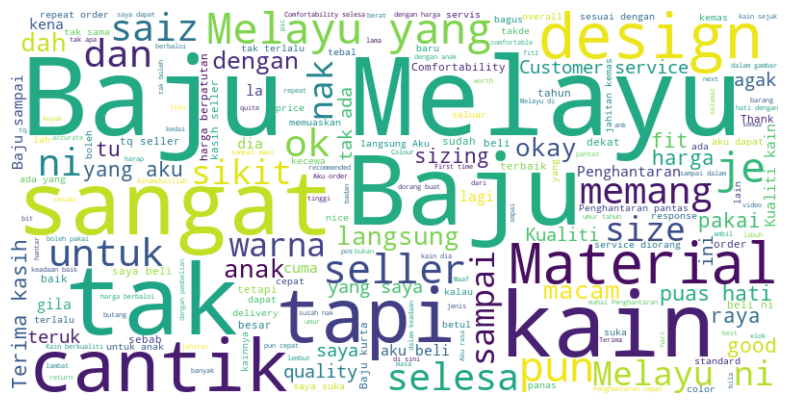

In [18]:
# Generate the word cloud
def clean_review(review):
  if not isinstance(review, str):
    return str(review)  # Convert float to string
  else:
    return review

cleaned_reviews = [clean_review(review) for review in combined_df['Product Review']]
reviews_text = ' '.join(cleaned_reviews)

wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(reviews_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
combined_df

,No,Author,Product Rating,Product Review
0,1,n*****n,3,"baju kurta sampai dalam keadaan baik, tapi tak..."
1,2,y*****i,2,"Sizing tak accurate langsung, aku rasa macam b..."
2,3,amalinadinee,2,"Baju kurta aku dah koyak sebelum pakai, memang..."
3,4,c*****8,5,Delivery laju. Kain cantik. Thanks seller. Mas...
4,5,8kbvdmoyw9,5,Baju selamat mendarat kain cantik dan sedap di...
...,...,...,...,...
458,9,s*****a,3,Pada baju ada warna merah\nCuba basuh masih x ...
460,11,*****n,2,Colour a bit different from the picture. And m...
461,12,m*****4,1,Warna nude kita mintak warna lain yg Smpai lpa...
463,14,k_w1z356vg,5,tidak mengikuti saiz yg saya nak


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">EDA</p>

In [40]:
# Create a new DataFrame with only the desired columns
selected_columns = ['Product Review','Product Rating']
combined_df = combined_df[selected_columns]

# Display the new DataFrame
print(combined_df)

                                        Product Review  Product Rating
0    baju kurta sampai dalam keadaan baik, tapi tak...               3
1    Sizing tak accurate langsung, aku rasa macam b...               2
2    Baju kurta aku dah koyak sebelum pakai, memang...               2
3    Delivery laju. Kain cantik. Thanks seller. Mas...               5
4    Baju selamat mendarat kain cantik dan sedap di...               5
..                                                 ...             ...
457  Pada baju ada warna merah\nCuba basuh masih x ...               3
458  Colour a bit different from the picture. And m...               2
459  Warna nude kita mintak warna lain yg Smpai lpa...               1
460                   tidak mengikuti saiz yg saya nak               5
461                         Ukuran tak sama saiz besar               1

[462 rows x 2 columns]


In [41]:
combined_df

,Product Review,Product Rating
0,"baju kurta sampai dalam keadaan baik, tapi tak...",3
1,"Sizing tak accurate langsung, aku rasa macam b...",2
2,"Baju kurta aku dah koyak sebelum pakai, memang...",2
3,Delivery laju. Kain cantik. Thanks seller. Mas...,5
4,Baju selamat mendarat kain cantik dan sedap di...,5
...,...,...
457,Pada baju ada warna merah\nCuba basuh masih x ...,3
458,Colour a bit different from the picture. And m...,2
459,Warna nude kita mintak warna lain yg Smpai lpa...,1
460,tidak mengikuti saiz yg saya nak,5


In [42]:
#demoji
import emoji

def convert_demojis(text):
    text_temp = emoji.demojize(text)
    return text_temp.replace(":", " ")

combined_df['demojiReview'] = combined_df['Product Review'].apply(convert_demojis)
combined_df['demojiReview'].head()

0    baju kurta sampai dalam keadaan baik, tapi tak...
1    Sizing tak accurate langsung, aku rasa macam b...
2    Baju kurta aku dah koyak sebelum pakai, memang...
3    Delivery laju. Kain cantik. Thanks seller. Mas...
4    Baju selamat mendarat kain cantik dan sedap di...
Name: demojiReview, dtype: object

In [43]:
#remove punctuation review

In [44]:
import re

def remove_punctuation(text):
    punctuation_pattern = r'[^\w\s]'
    text_without_punctuation = (re.sub(punctuation_pattern, ' ', text)).lower()
    
    cleaned_text_temp = text_without_punctuation.replace('\n', ' ')
    
    punctuation_chars = '''!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~'''
    cleaned_text = ''.join(char for char in cleaned_text_temp if char not in punctuation_chars)
    return cleaned_text

# Apply the remove_punctuation function to the 'text' column of your DataFrame
combined_df['removePunc_text'] = combined_df['demojiReview'].apply(remove_punctuation)
combined_df['removePunc_text'].head()

0    baju kurta sampai dalam keadaan baik  tapi tak...
1    sizing tak accurate langsung  aku rasa macam b...
2    baju kurta aku dah koyak sebelum pakai  memang...
3    delivery laju  kain cantik  thanks seller  mas...
4    baju selamat mendarat kain cantik dan sedap di...
Name: removePunc_text, dtype: object

In [45]:
# Function to expand contractions
import contractions

contractions.add('x','tidak')
contractions.add('tak','tidak')

def expand_contractions(text):
    return contractions.fix(text)

# Apply the function to the 'Review_Lcase' column
combined_df['contrated_text'] = combined_df['removePunc_text'].apply(expand_contractions)

# Display the updated DataFrame
combined_df.head()

,Product Review,Product Rating,demojiReview,removePunc_text,contrated_text
0,"baju kurta sampai dalam keadaan baik, tapi tak...",3,"baju kurta sampai dalam keadaan baik, tapi tak...",baju kurta sampai dalam keadaan baik tapi tak...,baju kurta sampai dalam keadaan baik tapi tid...
1,"Sizing tak accurate langsung, aku rasa macam b...",2,"Sizing tak accurate langsung, aku rasa macam b...",sizing tak accurate langsung aku rasa macam b...,sizing tidak accurate langsung aku rasa macam...
2,"Baju kurta aku dah koyak sebelum pakai, memang...",2,"Baju kurta aku dah koyak sebelum pakai, memang...",baju kurta aku dah koyak sebelum pakai memang...,baju kurta aku dah koyak sebelum pakai memang...
3,Delivery laju. Kain cantik. Thanks seller. Mas...,5,Delivery laju. Kain cantik. Thanks seller. Mas...,delivery laju kain cantik thanks seller mas...,delivery laju kain cantik thanks seller mas...
4,Baju selamat mendarat kain cantik dan sedap di...,5,Baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...


In [46]:
from googletrans import Translator
import pandas as pd

# Function to translate text
def translate_text(text, source_lang='en', target_lang='ms'):
    try:
        # Initialize the translator
        translator = Translator()

        # Translate text
        translation = translator.translate(text, src=source_lang, dest=target_lang)

        return translation.text
    except Exception as e:
        return str(e)

        
# Translate text in a specific column (e.g., 'demojiReview') and store the translations in a new column
combined_df['translated_text_ms'] = combined_df['contrated_text'].apply(translate_text)

# Display the translated text
combined_df['translated_text_ms'].head()


0    Baju kurta Sampai Dalam Keadaan Baik Tapi Tari...
1    SIZING TINDA Tepat Langsung Aku Rasa Macam Baj...
2    Baju kurta aku dah koyak Sebelum pakai memang ...
3    Penghantaran Laju Kain Cantik Terima kasih Pen...
4    Baju Selamat Mendarat Kain Cantik Dan Sedap Di...
Name: translated_text_ms, dtype: object

In [47]:
from googletrans import Translator
import pandas as pd

# Function to translate text
def translate_text(text, source_lang='ms', target_lang='en'):
    try:
        # Initialize the translator
        translator = Translator()

        # Translate text
        translation = translator.translate(text, src=source_lang, dest=target_lang)

        return translation.text
    except Exception as e:
        return str(e)

        
# Translate text in a specific column (e.g., 'demojiReview') and store the translations in a new column
combined_df['translated_text_en'] = combined_df['translated_text_ms'].apply(translate_text)

# Display the translated text
combined_df['translated_text_en'].head()

0    Kurta shirts are in good condition but pull there
1    The right sizing is right I feel like a high s...
2    Kurta shirt I was torn before wearing the dire...
3    Beautiful fabric delivery Thank you Seller is ...
4    Safe clothes landed beautiful and tasty fabric...
Name: translated_text_en, dtype: object

In [57]:

# Store the translated DataFrame to another CSV file
import pandas as pd

# Selecting specific columns for output file 1
selected_col_1 = ['translated_text_ms', 'Product Rating']
output_df_1 = combined_df[selected_col_1]

# Store the selected columns to another CSV file
output_df_1.to_csv('translated_output_ms.csv', index=False)


# Selecting specific columns for output file 2
selected_col_2 = ['translated_text_en', 'Product Rating']
output_df_2 = combined_df[selected_col_2]

# Store the selected columns to another CSV file
output_df_2.to_csv('translated_output_en.csv', index=False)

# Read the CSV files
translated_output_1 = pd.read_csv('translated_output_ms.csv')
translated_output_2 = pd.read_csv('translated_output_en.csv')

translated_output_1.columns = ['translated_text','Product Review']
translated_output_2.columns = ['translated_text','Product Review']
# Merge the CSV files on the common column 'Product Rating'
union_df = pd.concat([translated_output_1, translated_output_2])


# Store the merged DataFrame to a new CSV file
union_df.to_csv('translated_dataset.csv', index=False)


In [74]:
combined_df = pd.read_csv('translated_dataset.csv')


In [75]:
combined_df.columns

Index(['translated_text', 'Product Review'], dtype='object')

In [77]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
#nltk.download('stopwords')


# Define a function to remove stopwords
def remove_stopwords(text):
    # Tokenize the text
    text = str(text)
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stopwords_removed = [word for word in tokens if word.lower() not in stopwords.words('english')]
    # Join the words back into a single string
    return ' '.join(stopwords_removed)

# Apply the remove_stopwords function to the text column
combined_df['stopword_text'] = combined_df['translated_text'].apply(remove_stopwords)

combined_df['stopword_text']

0       Baju kurta Sampai Dalam Keadaan Baik Tapi Tari...
1       SIZING TINDA Tepat Langsung Aku Rasa Macam Baj...
2       Baju kurta aku dah koyak Sebelum pakai memang ...
3       Penghantaran Laju Kain Cantik Terima kasih Pen...
4       Baju Selamat Mendarat Kain Cantik Dan Sedap Di...
                              ...                        
1843                           shirt red tried wash still
1844         color slightly different picture size modern
1845    color nude asks another color forgets button f...
1846                           Reject following size want
1847                                       size pull size
Name: stopword_text, Length: 1848, dtype: object

In [78]:
#tokenise

In [79]:
# tokenization
from nltk.tokenize import word_tokenize

def word_tokenize_wrapper(text):
    text = str(text)
    return word_tokenize(text)

combined_df['tokenised_text'] = combined_df['translated_text'].apply(word_tokenize_wrapper)

combined_df['tokenised_text'].head()

0    [Baju, kurta, Sampai, Dalam, Keadaan, Baik, Ta...
1    [SIZING, TINDA, Tepat, Langsung, Aku, Rasa, Ma...
2    [Baju, kurta, aku, dah, koyak, Sebelum, pakai,...
3    [Penghantaran, Laju, Kain, Cantik, Terima, kas...
4    [Baju, Selamat, Mendarat, Kain, Cantik, Dan, S...
Name: tokenised_text, dtype: object

In [80]:
#normalise

In [81]:
normalized_word = pd.read_csv("normalisasi.csv")
normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

combined_df['normalise_text'] = combined_df['tokenised_text'].apply(normalized_term)
combined_df['normalise_text'].head()

0    [Baju, kurta, Sampai, Dalam, Keadaan, Baik, Ta...
1    [SIZING, TINDA, Tepat, Langsung, Aku, Rasa, Ma...
2    [Baju, kurta, saya, dah, koyak, Sebelum, pakai...
3    [Penghantaran, Laju, Kain, Cantik, Terima, kas...
4    [Baju, Selamat, Mendarat, Kain, Cantik, Dan, S...
Name: normalise_text, dtype: object

In [82]:
#! pip install Sastrawi
# data stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in text:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean=[]
    d_clean=" ".join(do)
    print(d_clean)
    return d_clean

combined_df['stemming_text'] = combined_df['normalise_text'].apply(stemming)

combined_df['stemming_text']

baju kurta sampai dalam ada baik tapi tarik ada
sizing tinda tepat langsung aku rasa macam baju sekolah zaman rendah expressionflessface
baju kurta saya dah koyak belum pakai memang tolak alit langsung facewithrollingeyes
hantar laju kain cantik terima kasih jual masih tunggu lagi 2pasan baju untuk smpai pos out lambat pulak dari yang ini
baju selamat darat kain cantik dan sedap di pakai jual amah abg j t pun laju buat keja
baju cantik pos dalam 4hri alit okay la terima kasih jual zanyface zanyface zanyface zanyface
selamat sampai terima kasih ya saiz ukur sama seperti dalam carta ukur
bungkus bagus dan baik barang sampai dengan selamat tiada kerosakan dan bocor plastik yang di balut video tiada kait kain baik dan lembut
baju saiz 3 4 ok semua cantik jahit kemis baju saiz 1 2 jahit kemas tapi ada sikit kotor karat bela baju skrg
perfect hantar sangat cepat alit kain pun best aak 1 tahun 11 bulan amik saiz 1 2 fit jual responden pun cepat
bahan baik barang sampai dalam ada baik jual pun

0         baju kurta sampai dalam ada baik tapi tarik ada
1       sizing tinda tepat langsung aku rasa macam baj...
2       baju kurta saya dah koyak belum pakai memang t...
3       hantar laju kain cantik terima kasih jual masi...
4       baju selamat darat kain cantik dan sedap di pa...
                              ...                        
1843     ons the shirt there is a red tried to wash still
1844    the color is slightly different from the pictu...
1845    the color of our nude asks for another color t...
1846                     reject following the size i want
1847                the size of the pull is the same size
Name: stemming_text, Length: 1848, dtype: object

In [83]:
#lemmatisation

import nltk
from nltk.stem import WordNetLemmatizer

# Download NLTK resources if you haven't already
#nltk.download('punkt')
#nltk.download('wordnet')

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize text
def lemmatize_text(words):
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Apply lemmatization to the 'text' column
combined_df['lemma_text'] = combined_df['normalise_text'].apply(lemmatize_text)

# Display the lemmatized text
combined_df['lemma_text']


0       Baju kurta Sampai Dalam Keadaan Baik Tapi Tari...
1       SIZING TINDA Tepat Langsung Aku Rasa Macam Baj...
2       Baju kurta saya dah koyak Sebelum pakai memang...
3       Penghantaran Laju Kain Cantik Terima kasih Pen...
4       Baju Selamat Mendarat Kain Cantik Dan Sedap Di...
                              ...                        
1843     Ons the shirt there is a red tried to wash still
1844    The color is slightly different from the pictu...
1845    The color of our nude asks for another color t...
1846                     Reject following the size I want
1847                The size of the pull is the same size
Name: lemma_text, Length: 1848, dtype: object

In [84]:
combined_df.head()

,translated_text,Product Review,stopword_text,tokenised_text,normalise_text,stemming_text,lemma_text
0,Baju kurta Sampai Dalam Keadaan Baik Tapi Tari...,3,Baju kurta Sampai Dalam Keadaan Baik Tapi Tari...,"[Baju, kurta, Sampai, Dalam, Keadaan, Baik, Ta...","[Baju, kurta, Sampai, Dalam, Keadaan, Baik, Ta...",baju kurta sampai dalam ada baik tapi tarik ada,Baju kurta Sampai Dalam Keadaan Baik Tapi Tari...
1,SIZING TINDA Tepat Langsung Aku Rasa Macam Baj...,2,SIZING TINDA Tepat Langsung Aku Rasa Macam Baj...,"[SIZING, TINDA, Tepat, Langsung, Aku, Rasa, Ma...","[SIZING, TINDA, Tepat, Langsung, Aku, Rasa, Ma...",sizing tinda tepat langsung aku rasa macam baj...,SIZING TINDA Tepat Langsung Aku Rasa Macam Baj...
2,Baju kurta aku dah koyak Sebelum pakai memang ...,2,Baju kurta aku dah koyak Sebelum pakai memang ...,"[Baju, kurta, aku, dah, koyak, Sebelum, pakai,...","[Baju, kurta, saya, dah, koyak, Sebelum, pakai...",baju kurta saya dah koyak belum pakai memang t...,Baju kurta saya dah koyak Sebelum pakai memang...
3,Penghantaran Laju Kain Cantik Terima kasih Pen...,5,Penghantaran Laju Kain Cantik Terima kasih Pen...,"[Penghantaran, Laju, Kain, Cantik, Terima, kas...","[Penghantaran, Laju, Kain, Cantik, Terima, kas...",hantar laju kain cantik terima kasih jual masi...,Penghantaran Laju Kain Cantik Terima kasih Pen...
4,Baju Selamat Mendarat Kain Cantik Dan Sedap Di...,5,Baju Selamat Mendarat Kain Cantik Dan Sedap Di...,"[Baju, Selamat, Mendarat, Kain, Cantik, Dan, S...","[Baju, Selamat, Mendarat, Kain, Cantik, Dan, S...",baju selamat darat kain cantik dan sedap di pa...,Baju Selamat Mendarat Kain Cantik Dan Sedap Di...


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Pos-Tagging</p>

- either dictionary (Rule-Based Tagging) or probability (HMM)

In [85]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Download NLTK resources
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')


In [86]:
from nltk import pos_tag
# Function to perform POS tagging on a list of words
def pos_tagging(words):
    return pos_tag(words)

# Apply POS tagging to the 'ContrationComment' column
combined_df['POS_Tags'] = combined_df['lemma_text'].apply(
    lambda x: pos_tagging(word_tokenize(' '.join(x)))
    if isinstance(x, list)
    else pos_tagging(word_tokenize(x))
)

# Display the DataFrame with POS tags
print(combined_df[['lemma_text', 'POS_Tags']])


                                             lemma_text  \
0     Baju kurta Sampai Dalam Keadaan Baik Tapi Tari...   
1     SIZING TINDA Tepat Langsung Aku Rasa Macam Baj...   
2     Baju kurta saya dah koyak Sebelum pakai memang...   
3     Penghantaran Laju Kain Cantik Terima kasih Pen...   
4     Baju Selamat Mendarat Kain Cantik Dan Sedap Di...   
...                                                 ...   
1843   Ons the shirt there is a red tried to wash still   
1844  The color is slightly different from the pictu...   
1845  The color of our nude asks for another color t...   
1846                   Reject following the size I want   
1847              The size of the pull is the same size   

                                               POS_Tags  
0     [(Baju, NNP), (kurta, VBD), (Sampai, NNP), (Da...  
1     [(SIZING, NN), (TINDA, NNP), (Tepat, NNP), (La...  
2     [(Baju, NNP), (kurta, VBD), (saya, JJ), (dah, ...  
3     [(Penghantaran, NNP), (Laju, NNP), (Kain, NNP)...  
4

# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Classify Contravtion Comments into 3 Categories</p>

In [90]:
combined_df.columns


Index(['translated_text', 'Product Review', 'stopword_text', 'tokenised_text',
       'normalise_text', 'stemming_text', 'lemma_text', 'POS_Tags'],
      dtype='object')

In [91]:
# Function to map ratings to sentiments
def map_sentiment(rating):
    if rating in [1, 2]:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    elif rating in [4, 5]:
        return 'Positive'
    else:
        return 'Unknown'  # Handle any other cases if needed

# Apply mapping to create 'Sentiment_Rating' column
combined_df['Sentiment_Rating'] = combined_df['Product Review'].apply(map_sentiment)

# Display the DataFrame with the new 'Sentiment_Rating' column
print(combined_df[['lemma_text','Product Review', 'Sentiment_Rating']])

                                             lemma_text  Product Review  \
0     Baju kurta Sampai Dalam Keadaan Baik Tapi Tari...               3   
1     SIZING TINDA Tepat Langsung Aku Rasa Macam Baj...               2   
2     Baju kurta saya dah koyak Sebelum pakai memang...               2   
3     Penghantaran Laju Kain Cantik Terima kasih Pen...               5   
4     Baju Selamat Mendarat Kain Cantik Dan Sedap Di...               5   
...                                                 ...             ...   
1843   Ons the shirt there is a red tried to wash still               3   
1844  The color is slightly different from the pictu...               2   
1845  The color of our nude asks for another color t...               1   
1846                   Reject following the size I want               5   
1847              The size of the pull is the same size               1   

     Sentiment_Rating  
0             Neutral  
1            Negative  
2            Negative  
3  

In [92]:
# Count the number of reviews for each sentiment for 'Contraction_Review'
sentiment_counts_Rating = combined_df['Sentiment_Rating'].value_counts()

# Display the counts for 'Contraction_Review'
print("Sentiment Counts for Contration_Review_Rating:")
print(sentiment_counts_Rating)


Sentiment Counts for Contration_Review_Rating:
Sentiment_Rating
Positive    796
Negative    596
Neutral     456
Name: count, dtype: int64


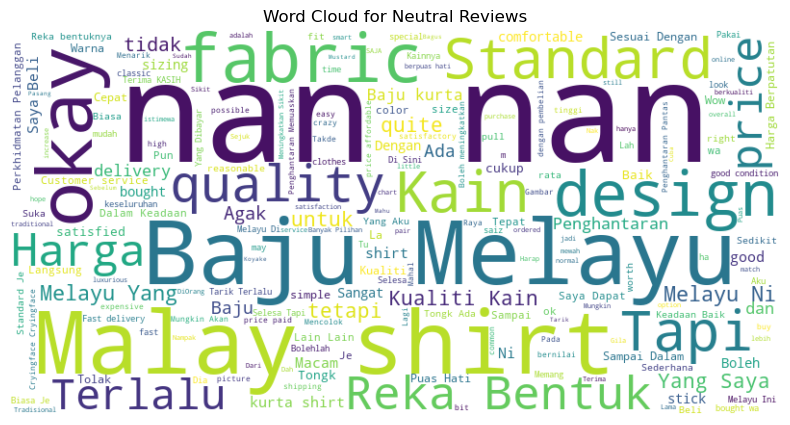

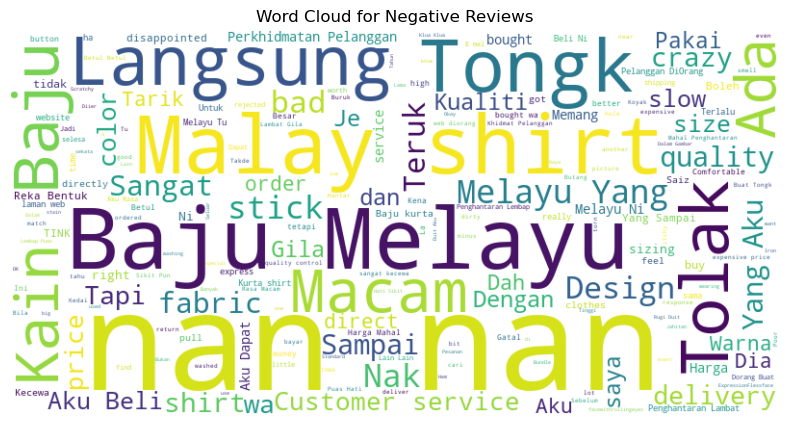

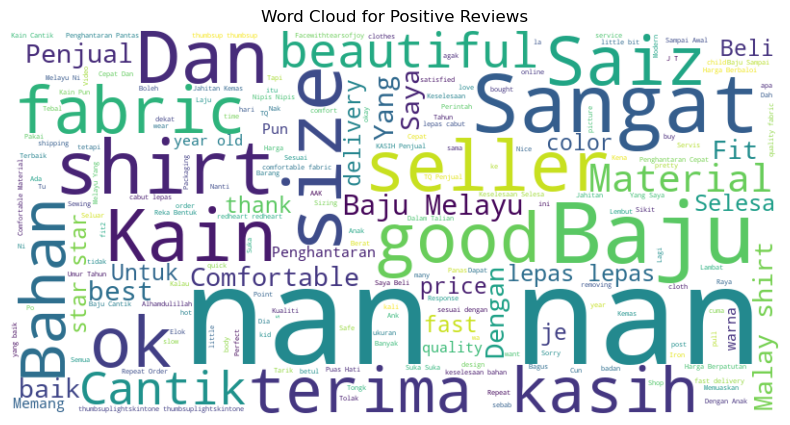

In [93]:
# Function to generate and display word cloud for a specific sentiment category
def generate_word_cloud(sentiment_category):
    # Filter the DataFrame for the specified sentiment category
    filtered_data = combined_df[combined_df['Sentiment_Rating'] == sentiment_category]

    # Concatenate all reviews in the filtered DataFrame
    text = ' '.join(filtered_data['lemma_text'])

    # Generate WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment_category} Reviews')
    plt.show()

# Generate word clouds for each sentiment category
sentiment_categories = combined_df['Sentiment_Rating'].unique()
for category in sentiment_categories:
    generate_word_cloud(category)


In [94]:
combined_df.to_csv("processed_data.csv", index=False)

# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Save as CSV File</p>

In [95]:
# Create a DataFrame with only the desired columns
selected_columns = ['lemma_text', 'Sentiment_Rating']
selected_data = combined_df[selected_columns]

# Save the selected columns to a CSV file
selected_data.to_csv('Contraction Review & Sentiment Rating.csv', index=False)

# Display a message indicating that the CSV file has been created
print("Selected columns saved to Contraction Review & Sentiment Rating.csv")


Selected columns saved to Contraction Review & Sentiment Rating.csv



# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Feature Engineering </p>

In [96]:
finalData = pd.read_csv('Contraction Review & Sentiment Rating.csv')


finalData.isnull().any().any()

True

In [97]:
finalData

,lemma_text,Sentiment_Rating
0,Baju kurta Sampai Dalam Keadaan Baik Tapi Tari...,Neutral
1,SIZING TINDA Tepat Langsung Aku Rasa Macam Baj...,Negative
2,Baju kurta saya dah koyak Sebelum pakai memang...,Negative
3,Penghantaran Laju Kain Cantik Terima kasih Pen...,Positive
4,Baju Selamat Mendarat Kain Cantik Dan Sedap Di...,Positive
...,...,...
1843,Ons the shirt there is a red tried to wash still,Neutral
1844,The color is slightly different from the pictu...,Negative
1845,The color of our nude asks for another color t...,Negative
1846,Reject following the size I want,Positive


In [98]:

# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split

# # Assuming x_train, x_test, y_train, y_test are already defined and contain your data
# # Split the data into training and testing sets
# x_train, x_test, y_train, y_test = train_test_split(data_final['Translated_Review_MS'], finalData['Sentiment_Rating'], test_size=0.2, random_state=42)

# # Create a TF-IDF vectorizer
# tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features based on your dataset size

# # Fit and transform the training data
# x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

# # Transform the test data using the same vectorizer
# x_test_tfidf = tfidf_vectorizer.transform(x_test)

# # Create an SVM model with RBF kernel
# svm_rbf = SVC(kernel='rbf')

# # Train the model
# svm_rbf.fit(x_train_tfidf, y_train)

# # Make predictions on the test set
# predicted = svm_rbf.predict(x_test_tfidf)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, predicted)
# print('The resulting accuracy using RBF is {:.2f}%'.format(100 * accuracy))


In [99]:
finalData.columns

Index(['lemma_text', 'Sentiment_Rating'], dtype='object')

In [100]:
finalData

,lemma_text,Sentiment_Rating
0,Baju kurta Sampai Dalam Keadaan Baik Tapi Tari...,Neutral
1,SIZING TINDA Tepat Langsung Aku Rasa Macam Baj...,Negative
2,Baju kurta saya dah koyak Sebelum pakai memang...,Negative
3,Penghantaran Laju Kain Cantik Terima kasih Pen...,Positive
4,Baju Selamat Mendarat Kain Cantik Dan Sedap Di...,Positive
...,...,...
1843,Ons the shirt there is a red tried to wash still,Neutral
1844,The color is slightly different from the pictu...,Negative
1845,The color of our nude asks for another color t...,Negative
1846,Reject following the size I want,Positive


In [101]:
finalData.dropna(subset=['lemma_text', 'Sentiment_Rating'], inplace=True)

In [185]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(finalData['lemma_text'], finalData['Sentiment_Rating'], test_size=0.2, random_state=42)


# Print the shapes of training and testing sets
print("Number of samples in Training Set:", len(X_train))
print("Number of samples in Testing Set:", len(X_test))



Number of samples in Training Set: 739
Number of samples in Testing Set: 185
97      Positive
227      Neutral
1616     Neutral
1511    Negative
1808    Negative
          ...   
106     Positive
270      Neutral
1784    Positive
435     Negative
102     Positive
Name: Sentiment_Rating, Length: 739, dtype: object


In [103]:
# Tokenize the text data
tokenized_data_train = X_train.apply(lambda x: word_tokenize(x.lower()))
tokenized_data_test = X_test.apply(lambda x: word_tokenize(x.lower()))

## TF-IDF

In [104]:
from nltk.tokenize import word_tokenize

#convert it into tf-idf 
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features based on your dataset size

x_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
x_test_tfidf = tfidf_vectorizer.transform(X_test)

print(x_train_tfidf)
print('===================')
print(x_test_tfidf)


  (0, 543)	0.307589950358095
  (0, 427)	0.24189236288711047
  (0, 588)	0.20927324849632906
  (0, 137)	0.19722860260683553
  (0, 428)	0.2720392482773981
  (0, 65)	0.28348401807014506
  (0, 870)	0.2123826139087512
  (0, 869)	0.1874814901636299
  (0, 57)	0.2049363997074771
  (0, 85)	0.10777415736130656
  (0, 808)	0.20927324849632906
  (0, 133)	0.29823889255932473
  (0, 260)	0.29823889255932473
  (0, 221)	0.3360358293200267
  (0, 731)	0.1729737911966641
  (0, 595)	0.33378959464002167
  (1, 505)	0.300847437663997
  (1, 201)	0.306823503306032
  (1, 408)	0.2954414287117003
  (1, 747)	0.3298215504063188
  (1, 590)	0.300847437663997
  (1, 200)	0.36913697160329173
  (1, 945)	0.21553592226645038
  (1, 789)	0.23143469547284573
  (1, 873)	0.306823503306032
  :	:
  (738, 431)	0.08612708378126854
  (738, 917)	0.060223006749897924
  (738, 226)	0.07753705560376463
  (738, 744)	0.08478108803960943
  (738, 107)	0.0582423707989031
  (738, 886)	0.06630685715385758
  (738, 761)	0.06674366014444247
  (738, 8

## Word2Vec

In [105]:

# from gensim.models import Word2Vec

# # Train Word2Vec model on tokenized data
# word2vec_model_train = Word2Vec(sentences=tokenized_data_train, vector_size=100, window=5, min_count=1, workers=4)
# word2vec_model_test  = Word2Vec(sentences=tokenized_data_test, vector_size=100, window=5, min_count=1, workers=4)

# x_train_w2v = []
# for doc_tokens in tokenized_data_train:
#     doc_vector = sum(word2vec_model_train.wv[token] for token in doc_tokens) / len(doc_tokens)
#     x_train_w2v.append(doc_vector)

# x_test_w2v = []
# for doc_tokens in tokenized_data_test:
#     doc_vector = sum(word2vec_model_test.wv[token] for token in doc_tokens) / len(doc_tokens)
#     x_test_w2v.append(doc_vector)

    
# print(x_train_w2v)
# print('===================')
# print(x_test_w2v)


## GloVe

In [106]:
#paste in console
#python -m spacy download en_core_web_md

In [107]:
import spacy
import numpy as np

# Load pre-trained GloVe vectors using spaCy
nlp = spacy.load('en_core_web_md') 

x_train_glo = []
for text in tokenized_data_train:
    doc = nlp(' '.join(text))  # Concatenate tokens into a single string
    doc_vector = np.mean([token.vector for token in doc], axis=0)
    x_train_glo.append(doc_vector)

x_test_glo = []
for text in tokenized_data_test:
    doc = nlp(' '.join(text))
    doc_vector = np.mean([token.vector for token in doc], axis=0)
    x_test_glo.append(doc_vector)

    
    
print(x_train_glo)
print('===========================')
print(x_test_glo)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[array([-2.65780002e-01,  1.07513809e+00, -8.03924680e-01,  1.27331138e-01,
        1.18994129e+00, -9.62683320e-01, -1.09075993e-01,  6.03162646e-01,
       -5.98759949e-01,  2.29231436e-02,  1.71712077e+00,  1.45808053e+00,
       -2.82073796e-01, -3.22224677e-01,  2.05743313e-01,  2.80990034e-01,
        2.57175803e-01,  2.12736681e-01,  1.61380008e-01, -8.11500400e-02,
       -5.30626595e-01,  6.31938279e-01, -5.53231359e-01,  8.24286714e-02,
       -4.76199329e-01, -1.55686641e+00, -6.00994766e-01, -7.13512123e-01,
       -3.30000557e-02, -7.37037957e-01, -7.40114748e-01, -2.19193865e-02,
       -7.00561285e-01, -8.83466661e-01,  1.88384068e+00,  3.26337993e-01,
       -7.40482688e-01,  8.34108055e-01, -1.82095194e+00,  3.40876043e-01,
       -3.08743984e-01, -1.60198390e+00, -4.72732663e-01,  4.43938673e-01,
        4.74036694e-01,  8.40080619e-01, -1.14279485e+00,  3.67668481e-03,
       -2.82334685e-01, -6.57068789e-01, -1.11043274e+00, -3.00615996e-01,
       -1.02101529e+00, 

## normalisation

In [108]:
def min_max_scaling(embeddings):
    min_vals = np.min(embeddings, axis=0)
    max_vals = np.max(embeddings, axis=0)
    normalized_embeddings = (embeddings - min_vals) / (max_vals - min_vals)
    return normalized_embeddings


# x_train_w2v = min_max_scaling(x_train_w2v)
x_train_glo = min_max_scaling(x_train_glo)

# x_test_w2v = min_max_scaling(x_test_w2v)
x_test_glo = min_max_scaling(x_test_glo)


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Model Training, Testing and Evaluation</p>


# <p style="padding:10px;background-color:gold;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:300">Supervised Learning</p>

In [109]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Initialize individual classifiers
svm_clf = SVC(probability=True)
rf_clf = RandomForestClassifier(n_estimators=100)
dt_clf = DecisionTreeClassifier()
lr_clf = LogisticRegression(max_iter=1000)
knn_clf = KNeighborsClassifier()
nb_clf = GaussianNB()

# Create a list of tuples with classifier names and their corresponding models
classifiers = [
    ('svm', svm_clf),
    ('random_forest', rf_clf),
    ('decision_tree', dt_clf),
    ('logistic_regression', lr_clf),
    ('knn', knn_clf),
    ('naive_bayes', nb_clf)
]

# Initialize the voting classifier with the list of classifiers
voting_clf = VotingClassifier(estimators=classifiers, voting='soft')

x_train_tfidf_dense = x_train_tfidf.toarray()
x_test_tfidf_dense = x_test_tfidf.toarray()

# Train the voting classifier
voting_clf.fit(x_train_tfidf_dense, y_train)



# Evaluate the voting classifier
y_pred = voting_clf.predict(x_test_tfidf_dense)
accuracy = accuracy_score(y_test, y_pred)
print("Voting Classifier Accuracy:", accuracy)

Voting Classifier Accuracy: 0.8108108108108109



# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Support Vector Machine (SVM)</p>

## find the best parameters

In [110]:
# #find the best parameter using Grid Search

# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV

# # Define parameter grid
# param_grid = {
#     'C': [0.1, 1, 10, 100],
#     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
#     'gamma': [0.1, 0.01, 0.001, 0.0001]
# }

# # Instantiate SVM model
# svm = SVC()

# # Instantiate GridSearchCV
# grid_search_tfidf_temp = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
# grid_search_w2v_temp = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
# grid_search_glo_temp = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# # Fit GridSearchCV
# grid_search_tfidf = grid_search_tfidf_temp.fit(x_train_tfidf, y_train)
# grid_search_w2v = grid_search_w2v_temp.fit(x_train_w2v, y_train)
# grid_search_glo = grid_search_glo_temp.fit(x_train_glo, y_train)

# # Get the best parameters
# best_params_tfidf = grid_search_tfidf.best_params_
# best_params_w2v = grid_search_w2v.best_params_
# best_params_glo = grid_search_glo.best_params_

# print("Best Parameters for TD-IDF  :", best_params_tfidf)
# print("Best Parameters for W2V     :", best_params_w2v)
# print("Best Parameters for GloVe   :", best_params_glo)



## SVM model start here

In [111]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Create the SVM model with the best parameters
# best_svm_model_tfidf = SVC(**best_params_tfidf)
# best_svm_model_w2v = SVC(**best_params_w2v)
# best_svm_model_glo = SVC(**best_params_glo)

best_svm_model_tfidf = SVC(**{'C': 10, 'gamma': 0.1, 'kernel': 'sigmoid'})
# best_svm_model_w2v = SVC(**{'C': 1, 'gamma': 0.1, 'kernel': 'linear'})
best_svm_model_glo = SVC(**{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'})


# Train the best SVM model on your training data
best_svm_model_tfidf.fit(x_train_tfidf, y_train)
# best_svm_model_w2v.fit(x_train_w2v, y_train)
best_svm_model_glo.fit(x_train_glo, y_train)


#predict model
svm_predictions_tfidf = best_svm_model_tfidf.predict(x_test_tfidf)
# svm_predictions_w2v   = best_svm_model_w2v.predict(x_test_w2v)
svm_predictions_glo   = best_svm_model_glo.predict(x_test_glo)

In [112]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Calculate performance metrics for SVM
accuracy_svm_tfidf  = accuracy_score(y_test, svm_predictions_tfidf)
precision_svm_tfidf = precision_score(y_test, svm_predictions_tfidf, average='micro')
recall_svm_tfidf    = recall_score(y_test, svm_predictions_tfidf, average='micro')
f1_svm_tfidf        = f1_score(y_test, svm_predictions_tfidf, average='micro')

# accuracy_svm_w2v    = accuracy_score(y_test, svm_predictions_w2v)
# precision_svm_w2v   = precision_score(y_test, svm_predictions_w2v, average='micro')
# recall_svm_w2v      = recall_score(y_test, svm_predictions_w2v, average='micro')
# f1_svm_w2v          = f1_score(y_test, svm_predictions_w2v, average='micro')

accuracy_svm_glo    = accuracy_score(y_test, svm_predictions_glo)
precision_svm_glo   = precision_score(y_test, svm_predictions_glo, average='micro')
recall_svm_glo      = recall_score(y_test, svm_predictions_glo, average='micro')
f1_svm_glo          = f1_score(y_test, svm_predictions_glo, average='micro')

print('SVM Model Metrics for TF-IDF:')
print('Accuracy  : {:.2f} %'.format(accuracy_svm_tfidf*100))
print('Precision : {:.2f} %'.format(precision_svm_tfidf*100))
print('Recall    : {:.2f} %'.format(recall_svm_tfidf*100))
print('F1 Score  : {:.2f} %'.format(f1_svm_tfidf*100))
print('')
# print('SVM Model Metrics for W2V:')
# print('Accuracy  : {:.2f} %'.format(accuracy_svm_w2v*100))
# print('Precision : {:.2f} %'.format(precision_svm_w2v*100))
# print('Recall    : {:.2f} %'.format(recall_svm_w2v*100))
# print('F1 Score  : {:.2f} %'.format(f1_svm_w2v*100))
print('')
print('SVM Model Metrics for GloVe:')
print('Accuracy  : {:.2f} %'.format(accuracy_svm_glo*100))
print('Precision : {:.2f} %'.format(precision_svm_glo*100))
print('Recall    : {:.2f} %'.format(recall_svm_glo*100))
print('F1 Score  : {:.2f} %'.format(f1_svm_glo*100))

SVM Model Metrics for TF-IDF:
Accuracy  : 80.54 %
Precision : 80.54 %
Recall    : 80.54 %
F1 Score  : 80.54 %


SVM Model Metrics for GloVe:
Accuracy  : 57.30 %
Precision : 57.30 %
Recall    : 57.30 %
F1 Score  : 57.30 %


## confusion martrix

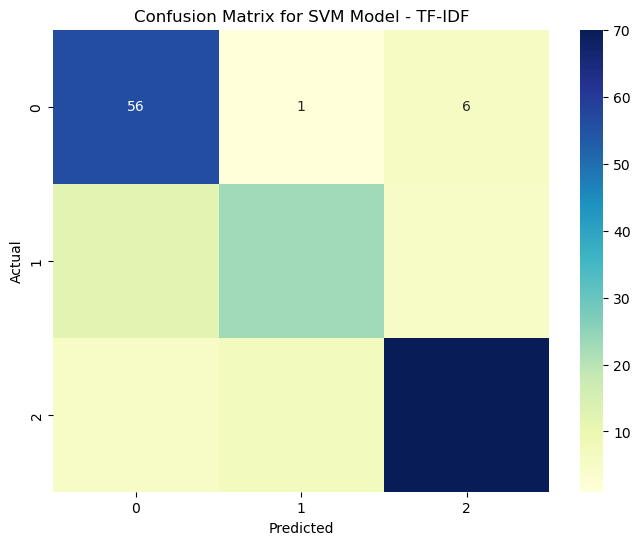

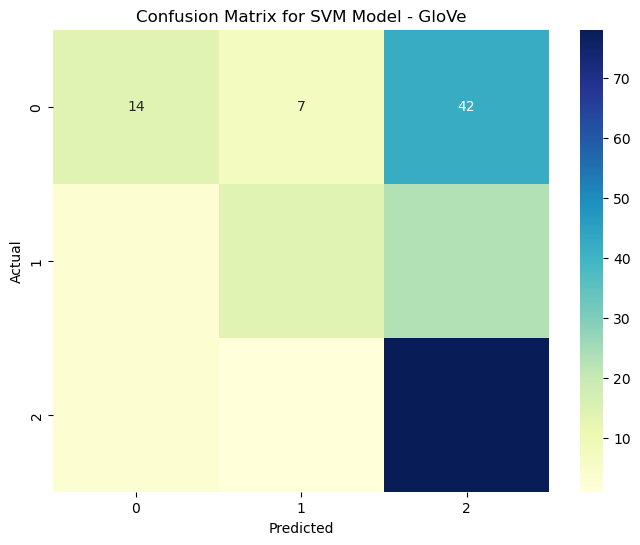

In [113]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix for SVM
cm_svm_tfidf = confusion_matrix(y_test, svm_predictions_tfidf)
# cm_svm_w2v = confusion_matrix(y_test, svm_predictions_w2v)
cm_svm_glo = confusion_matrix(y_test, svm_predictions_glo)

# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_tfidf, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM Model - TF-IDF')
plt.show()


# # Plot the confusion matrix for SVM
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm_svm_w2v, annot=True, fmt='d', cmap="YlGnBu")
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix for SVM Model - W2V')
# plt.show()

# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_glo, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM Model - GloVe')
plt.show()



# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Random Forest</p>

## finding the best params 

In [114]:
# # Import libraries
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#   'n_estimators': [100, 200, 300, 1000],  # Number of trees in the forest
#   'max_depth': [40, 60, 80, 100],       # Maximum depth of individual trees
#   'max_features': ['auto', 'sqrt', 'log2'] # Number of features considered at each split
# }

# # Create the RandomForestClassifier model
# rf = RandomForestClassifier()

# # Perform grid search with cross-validation
# grid_search_tfidf_temp = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
# grid_search_w2v_temp   = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
# grid_search_glo_temp   = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')

# grid_search_tfidf = grid_search_tfidf_temp.fit(x_train_tfidf, y_train)
# grid_search_w2v   = grid_search_w2v_temp.fit(x_train_w2v, y_train)
# grid_search_glo   = grid_search_glo_temp.fit(x_train_glo, y_train)

# # Get the best parameters
# best_params_tfidf = grid_search_tfidf.best_params_
# best_params_w2v   = grid_search_w2v.best_params_
# best_params_glo   = grid_search_glo.best_params_

# print("Best Parameters for TD-IDF  : ", best_params_tfidf)
# print("Best Parameters for W2V     : ", best_params_w2v)
# print("Best Parameters for GloVe   : ", best_params_glo)


## model start here

In [115]:
from sklearn.ensemble import RandomForestClassifier
# Initialize Random Forest Classifier
# rf_classifier_tfidf = RandomForestClassifier(**best_params_tfidf)
# rf_classifier_w2v   = RandomForestClassifier(**best_params_w2v)
# rf_classifier_glo   = RandomForestClassifier(**best_params_glo)

rf_classifier_tfidf = RandomForestClassifier(**{'max_depth': 80, 'max_features': 'sqrt', 'n_estimators': 100})
# rf_classifier_w2v   = RandomForestClassifier(**{'max_depth': 40, 'max_features': 'sqrt', 'n_estimators': 300})
rf_classifier_glo   = RandomForestClassifier(**{'max_depth': 60, 'max_features': 'log2', 'n_estimators': 100})

# Fit the classifier on the training data
rf_classifier_tfidf.fit(x_train_tfidf, y_train)
# rf_classifier_w2v.fit(x_train_w2v, y_train)
rf_classifier_glo.fit(x_train_glo, y_train)

# Predict on the testing data
rf_predictions_tfidf = rf_classifier_tfidf.predict(x_test_tfidf)
# rf_predictions_w2v = rf_classifier_w2v.predict(x_test_w2v)
rf_predictions_glo = rf_classifier_glo.predict(x_test_glo)





In [116]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Calculate performance metrics for SVM
accuracy_rf_tfidf  = accuracy_score(y_test, rf_predictions_tfidf)
precision_rf_tfidf = precision_score(y_test, rf_predictions_tfidf, average='micro')
recall_rf_tfidf    = recall_score(y_test, rf_predictions_tfidf, average='micro')
f1_rf_tfidf        = f1_score(y_test, rf_predictions_tfidf, average='micro')

# accuracy_rf_w2v    = accuracy_score(y_test, rf_predictions_w2v)
# precision_rf_w2v   = precision_score(y_test, rf_predictions_w2v, average='micro')
# recall_rf_w2v      = recall_score(y_test, rf_predictions_w2v, average='micro')
# f1_rf_w2v          = f1_score(y_test, rf_predictions_w2v, average='micro')

accuracy_rf_glo    = accuracy_score(y_test, rf_predictions_glo)
precision_rf_glo   = precision_score(y_test, rf_predictions_glo, average='micro')
recall_rf_glo      = recall_score(y_test, rf_predictions_glo, average='micro')
f1_rf_glo          = f1_score(y_test, rf_predictions_glo, average='micro')

print('Random Forest Metrics TF-IDF:')
print('Accuracy  : {:.2f} %'.format(accuracy_rf_tfidf*100))
print('Precision : {:.2f} %'.format(precision_rf_tfidf*100))
print('Recall    : {:.2f} %'.format(recall_rf_tfidf*100))
print('F1 Score  : {:.2f} %'.format(f1_rf_tfidf*100))
print('')
# print('Random Forest Metrics for W2v:')
# print('Accuracy  : {:.2f} %'.format(accuracy_rf_w2v*100))
# print('Precision : {:.2f} %'.format(precision_rf_w2v*100))
# print('Recall    : {:.2f} %'.format(recall_rf_w2v*100))
# print('F1 Score  : {:.2f} %'.format(f1_rf_w2v*100))
print('')
print('Random Forest Metrics for GloVe:')
print('Accuracy  : {:.2f} %'.format(accuracy_rf_glo*100))
print('Precision : {:.2f} %'.format(precision_rf_glo*100))
print('Recall    : {:.2f} %'.format(recall_rf_glo*100))
print('F1 Score  : {:.2f} %'.format(f1_rf_glo*100))


Random Forest Metrics TF-IDF:
Accuracy  : 81.08 %
Precision : 81.08 %
Recall    : 81.08 %
F1 Score  : 81.08 %


Random Forest Metrics for GloVe:
Accuracy  : 60.54 %
Precision : 60.54 %
Recall    : 60.54 %
F1 Score  : 60.54 %


## confusion martrix

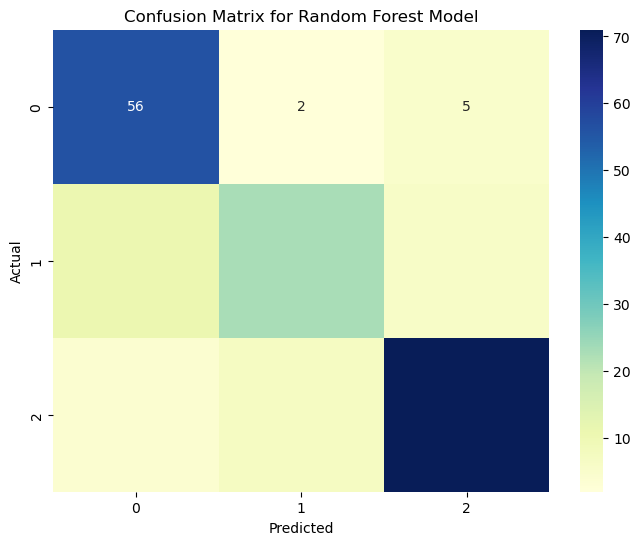

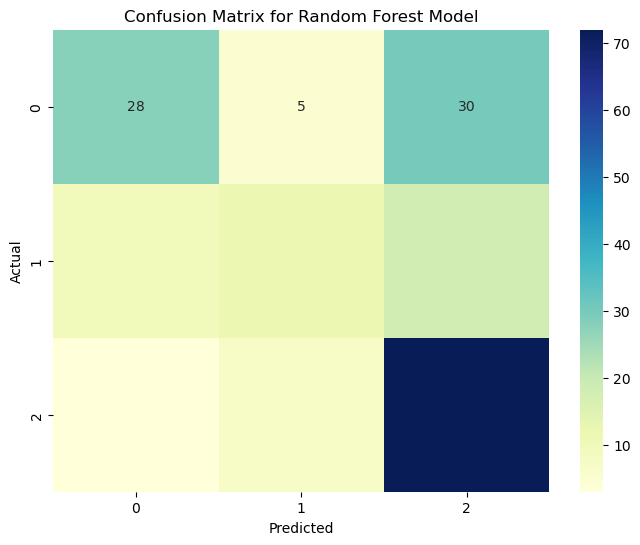

In [117]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix for rf
cm_rf_tfidf = confusion_matrix(y_test, rf_predictions_tfidf)
# cm_rf_w2v = confusion_matrix(y_test, rf_predictions_w2v)
cm_rf_glo = confusion_matrix(y_test, rf_predictions_glo)


# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_tfidf, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# Plot the confusion matrix for SVM
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm_rf_w2v, annot=True, fmt='d', cmap="YlGnBu")
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix for Random Forest Model')
# plt.show()

# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_glo, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()



# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Decision Tree</p>

## finding the best params 

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search_tfidf_temp = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
# grid_search_w2v_temp   = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search_glo_temp   = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')


grid_search_tfidf = grid_search_tfidf_temp.fit(x_train_tfidf, y_train)
# grid_search_w2v   = grid_search_w2v_temp.fit(x_train_w2v, y_train)
grid_search_glo   = grid_search_glo_temp.fit(x_train_glo, y_train)

# Get the best parameters
best_params_tfidf = grid_search_tfidf.best_params_
# best_params_w2v   = grid_search_w2v.best_params_
best_params_glo   = grid_search_glo.best_params_

print("Best Parameters for TD-IDF  : ", best_params_tfidf)
# print("Best Parameters for W2V     : ", best_params_w2v)
print("Best Parameters for GloVe   : ", best_params_glo)


Best Parameters for TD-IDF  :  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Parameters for GloVe   :  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


## model start here

In [119]:
# Initialize Random Forest Classifier
dt_classifier_tfidf = DecisionTreeClassifier(**best_params_tfidf)
# dt_classifier_w2v   = DecisionTreeClassifier(**best_params_w2v)
dt_classifier_glo   = DecisionTreeClassifier(**best_params_glo)

# Fit the classifier on the training data
dt_classifier_tfidf.fit(x_train_tfidf, y_train)
# dt_classifier_w2v.fit(x_train_w2v, y_train)
dt_classifier_glo.fit(x_train_glo, y_train)

# Predict on the testing data
dt_predictions_tfidf = dt_classifier_tfidf.predict(x_test_tfidf)
# dt_predictions_w2v   = dt_classifier_w2v.predict(x_test_w2v)
dt_predictions_glo   = dt_classifier_glo.predict(x_test_glo)



In [120]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Calculate performance metrics for SVM
accuracy_dt_tfidf  = accuracy_score(y_test, dt_predictions_tfidf)
precision_dt_tfidf = precision_score(y_test, dt_predictions_tfidf, average='micro')
recall_dt_tfidf    = recall_score(y_test, dt_predictions_tfidf, average='micro')
f1_dt_tfidf        = f1_score(y_test, dt_predictions_tfidf, average='micro')

# accuracy_dt_w2v  = accuracy_score(y_test, dt_predictions_w2v)
# precision_dt_w2v = precision_score(y_test, dt_predictions_w2v, average='micro')
# recall_dt_w2v    = recall_score(y_test, dt_predictions_w2v, average='micro')
# f1_dt_w2v        = f1_score(y_test, dt_predictions_w2v, average='micro')

accuracy_dt_glo  = accuracy_score(y_test, dt_predictions_glo)
precision_dt_glo = precision_score(y_test, dt_predictions_glo, average='micro')
recall_dt_glo    = recall_score(y_test, dt_predictions_glo, average='micro')
f1_dt_glo        = f1_score(y_test, dt_predictions_glo, average='micro')

print('DT Model Metrics TF-IDF::')
print('Accuracy  : {:.2f} %'.format(accuracy_dt_tfidf*100))
print('Precision : {:.2f} %'.format(precision_dt_tfidf*100))
print('Recall    : {:.2f} %'.format(recall_dt_tfidf*100))
print('F1 Score  : {:.2f} %'.format(f1_dt_tfidf*100))
print('')
# print('DT Model Metrics W2V:')
# print('Accuracy  : {:.2f} %'.format(accuracy_dt_w2v*100))
# print('Precision : {:.2f} %'.format(precision_dt_w2v*100))
# print('Recall    : {:.2f} %'.format(recall_dt_w2v*100))
# print('F1 Score  : {:.2f} %'.format(f1_dt_w2v*100))
print('')
print('DT Model Metrics GloVe::')
print('Accuracy  : {:.2f} %'.format(accuracy_dt_glo*100))
print('Precision : {:.2f} %'.format(precision_dt_glo*100))
print('Recall    : {:.2f} %'.format(recall_dt_glo*100))
print('F1 Score  : {:.2f} %'.format(f1_dt_glo*100))


DT Model Metrics TF-IDF::
Accuracy  : 68.65 %
Precision : 68.65 %
Recall    : 68.65 %
F1 Score  : 68.65 %


DT Model Metrics GloVe::
Accuracy  : 48.11 %
Precision : 48.11 %
Recall    : 48.11 %
F1 Score  : 48.11 %


## confusion martrix

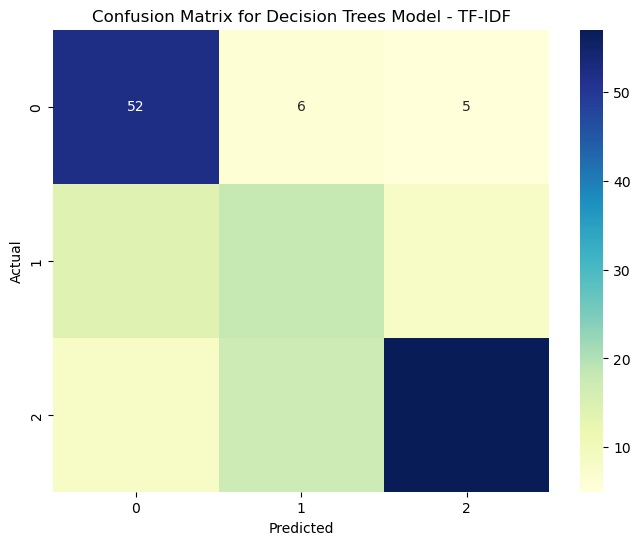

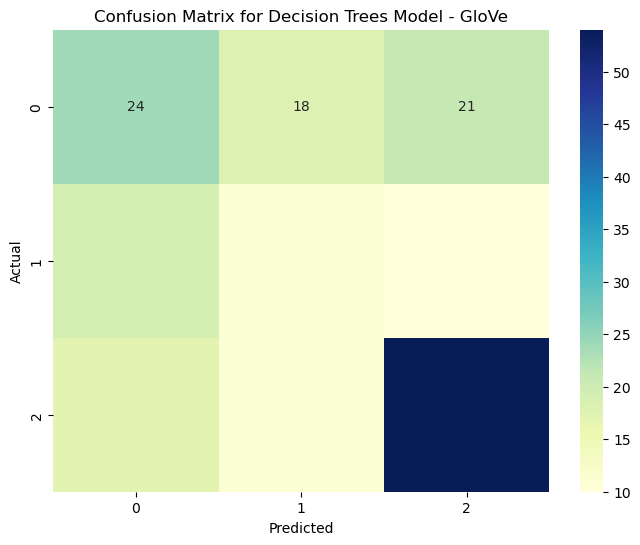

In [121]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

cm_svm_tfidf = confusion_matrix(y_test, dt_predictions_tfidf)
# cm_svm_w2v   = confusion_matrix(y_test, dt_predictions_w2v)
cm_svm_glo   = confusion_matrix(y_test, dt_predictions_glo)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_tfidf, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Trees Model - TF-IDF')
plt.show()


# plt.figure(figsize=(8, 6))
# sns.heatmap(cm_svm_w2v, annot=True, fmt='d', cmap="YlGnBu")
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix for Decision Trees Model - W2V')
# plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_glo, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Trees Model - GloVe')
plt.show()



# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Logistic Regression Model</p>

## finding the best params

In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear', 'saga']  
}

logistic_regression = LogisticRegression()

grid_search_tfidf_temp = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')
# grid_search_w2v_temp   = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')
grid_search_glo_temp   = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')


grid_search_tfidf = grid_search_tfidf_temp.fit(x_train_tfidf, y_train)
# grid_search_w2v   = grid_search_w2v_temp.fit(x_train_w2v, y_train)
grid_search_glo   = grid_search_glo_temp.fit(x_train_glo, y_train)

best_params_tfidf = grid_search_tfidf.best_params_
# best_params_w2v   = grid_search_w2v.best_params_
best_params_glo   = grid_search_glo.best_params_


print("Best Parameters for TF-IDF :", best_params_tfidf)
# print("Best Parameters for W2V    :", best_params_w2v)
print("Best Parameters for GloVe  :", best_params_glo)


Best Parameters for TF-IDF : {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
Best Parameters for GloVe  : {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


## model start here

In [123]:
from sklearn.linear_model import LogisticRegression

# logistic_regression_tfidf   = LogisticRegression(**best_params_tfidf)
# logistic_regression_w2v     = LogisticRegression(**best_params_w2v)
# logistic_regression_glo     = LogisticRegression(**best_params_glo)

logistic_regression_tfidf   = LogisticRegression(**{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'})
# logistic_regression_w2v     = LogisticRegression(**{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'})
logistic_regression_glo     = LogisticRegression(**{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'})

logistic_regression_tfidf.fit(x_train_tfidf, y_train)
# logistic_regression_w2v.fit(x_train_w2v, y_train)
logistic_regression_glo.fit(x_train_glo, y_train)

lr_predictions_tfidf = logistic_regression_tfidf.predict(x_test_tfidf)
# lr_predictions_w2v   = logistic_regression_w2v.predict(x_test_w2v)
lr_predictions_glo   = logistic_regression_glo.predict(x_test_glo)

In [124]:

accuracy_lr_tfidf  = accuracy_score(y_test, lr_predictions_tfidf)
precision_lr_tfidf = precision_score(y_test, lr_predictions_tfidf, average='micro')
recall_lr_tfidf    = recall_score(y_test, lr_predictions_tfidf, average='micro')
f1_lr_tfidf        = f1_score(y_test, lr_predictions_tfidf, average='micro')

# accuracy_lr_w2v  = accuracy_score(y_test, lr_predictions_w2v)
# precision_lr_w2v = precision_score(y_test, lr_predictions_w2v, average='micro')
# recall_lr_w2v    = recall_score(y_test, lr_predictions_w2v, average='micro')
# f1_lr_w2v        = f1_score(y_test, lr_predictions_w2v, average='micro')

accuracy_lr_glo  = accuracy_score(y_test, lr_predictions_glo)
precision_lr_glo = precision_score(y_test, lr_predictions_glo, average='micro')
recall_lr_glo    = recall_score(y_test, lr_predictions_glo, average='micro')
f1_lr_glo        = f1_score(y_test, lr_predictions_glo, average='micro')

print('Logistic Regression Model Metrics - TF-IDF:')
print('Accuracy  : {:.2f} %'.format(accuracy_lr_tfidf*100))
print('Precision : {:.2f} %'.format(precision_lr_tfidf*100))
print('Recall    : {:.2f} %'.format(recall_lr_tfidf*100))
print('F1 Score  : {:.2f} %'.format(f1_lr_tfidf*100))
print('')
# print('Logistic Regression Model Metrics - TF-IDF:')
# print('Accuracy  : {:.2f} %'.format(accuracy_lr_w2v*100))
# print('Precision : {:.2f} %'.format(precision_lr_w2v*100))
# print('Recall    : {:.2f} %'.format(recall_lr_w2v*100))
# print('F1 Score  : {:.2f} %'.format(f1_lr_w2v*100))
print('')
print('Logistic Regression Model Metrics - TF-IDF:')
print('Accuracy  : {:.2f} %'.format(accuracy_lr_glo*100))
print('Precision : {:.2f} %'.format(precision_lr_glo*100))
print('Recall    : {:.2f} %'.format(recall_lr_glo*100))
print('F1 Score  : {:.2f} %'.format(f1_lr_glo*100))

Logistic Regression Model Metrics - TF-IDF:
Accuracy  : 79.46 %
Precision : 79.46 %
Recall    : 79.46 %
F1 Score  : 79.46 %


Logistic Regression Model Metrics - TF-IDF:
Accuracy  : 55.14 %
Precision : 55.14 %
Recall    : 55.14 %
F1 Score  : 55.14 %


## confusion martrix

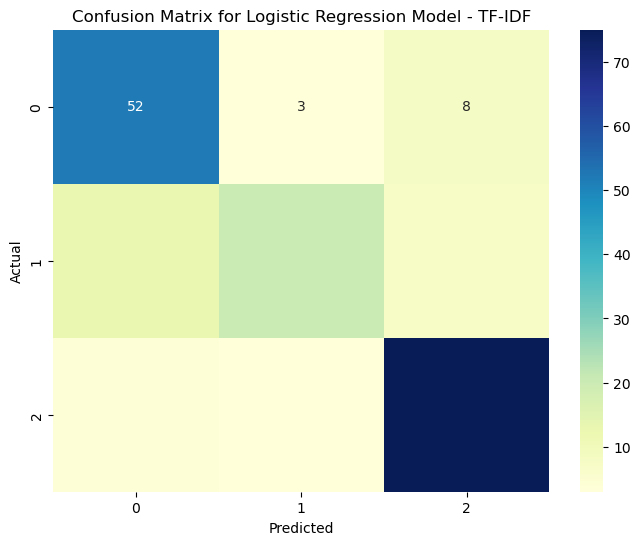

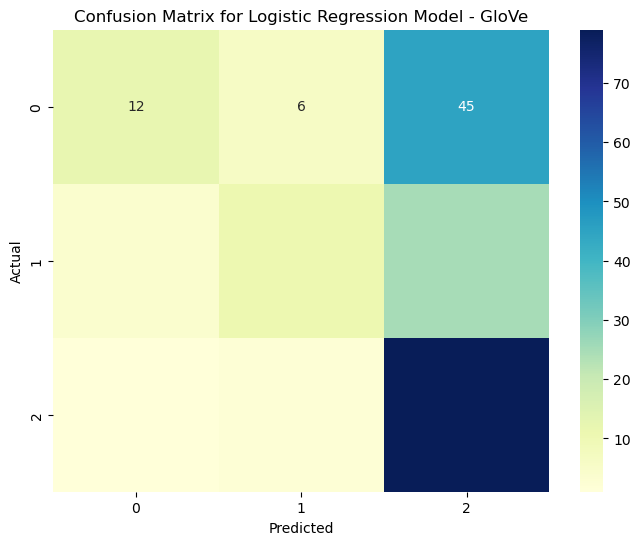

In [125]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

cm_svm_tfidf = confusion_matrix(y_test, lr_predictions_tfidf)
# cm_svm_w2v   = confusion_matrix(y_test, lr_predictions_w2v)
cm_svm_glo   = confusion_matrix(y_test, lr_predictions_glo)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_tfidf, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model - TF-IDF')
plt.show()


# plt.figure(figsize=(8, 6))
# sns.heatmap(cm_svm_w2v, annot=True, fmt='d', cmap="YlGnBu")
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix for Logistic Regression Model - W2V')
# plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_glo, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model - GloVe')
plt.show()



# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Naive Bayes</p>

## find the best parameters

In [126]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}

# Instantiate Naive Bayes model
naive_bayes = MultinomialNB()

# Instantiate GridSearchCV
grid_search_tfidf_temp = GridSearchCV(naive_bayes, param_grid, cv=5, scoring='accuracy')
# grid_search_w2v_temp   = GridSearchCV(naive_bayes, param_grid, cv=5, scoring='accuracy')
grid_search_glo_temp   = GridSearchCV(naive_bayes, param_grid, cv=5, scoring='accuracy')

grid_search_tfidf = grid_search_tfidf_temp.fit(x_train_tfidf, y_train)
# grid_search_w2v   = grid_search_w2v_temp.fit(x_train_w2v, y_train)
grid_search_glo   = grid_search_glo_temp.fit(x_train_glo, y_train)

# Get the best parameters
best_params_tfidf = grid_search_tfidf.best_params_
# best_params_w2v   = grid_search_w2v.best_params_
best_params_glo   = grid_search_glo.best_params_


print("Best Parameters for TF-IDF :", best_params_tfidf)
# print("Best Parameters for W2V    :", best_params_w2v)
print("Best Parameters for GloVe  :", best_params_glo)


Best Parameters for TF-IDF : {'alpha': 0.5}
Best Parameters for GloVe  : {'alpha': 0.1}


## Naive Bayes model start here

In [127]:
from sklearn.naive_bayes import MultinomialNB

# Create Naive Bayes model with the best parameters
nb_tfidf   = MultinomialNB(**best_params_tfidf)
# nb_w2v     = MultinomialNB(**best_params_w2v)
nb_glo     = MultinomialNB(**best_params_glo)

# nb_tfidf   = MultinomialNB(**{'alpha': 0.1})
# # nb_w2v     = MultinomialNB(**{'alpha': 0.1})
# nb_glo     = MultinomialNB(**{'alpha': 0.1})

# Train the best Logistic Regression model on your training data
nb_tfidf.fit(x_train_tfidf, y_train)
# nb_w2v.fit(x_train_w2v, y_train)
nb_glo.fit(x_train_glo, y_train)

# Predict on the testing data
nb_predictions_tfidf = nb_tfidf.predict(x_test_tfidf)
# nb_predictions_w2v   = nb_w2v.predict(x_test_w2v)
nb_predictions_glo   = nb_glo.predict(x_test_glo)

In [128]:

# Calculate performance metrics for Naive Bayes
accuracy_nb_tfidf   = accuracy_score(y_test, nb_predictions_tfidf)
precision_nb_tfidf  = precision_score(y_test, nb_predictions_tfidf, average='micro')
recall_nb_tfidf     = recall_score(y_test, nb_predictions_tfidf, average='micro')
f1_nb_tfidf         = f1_score(y_test, nb_predictions_tfidf, average='micro')

# accuracy_nb_w2v   = accuracy_score(y_test, nb_predictions_w2v)
# precision_nb_w2v  = precision_score(y_test, nb_predictions_w2v, average='micro')
# recall_nb_w2v     = recall_score(y_test, nb_predictions_w2v, average='micro')
# f1_nb_w2v         = f1_score(y_test, nb_predictions_w2v, average='micro')

accuracy_nb_glo   = accuracy_score(y_test, nb_predictions_glo )
precision_nb_glo  = precision_score(y_test, nb_predictions_glo , average='micro')
recall_nb_glo     = recall_score(y_test, nb_predictions_glo , average='micro')
f1_nb_glo         = f1_score(y_test, nb_predictions_glo , average='micro')

print('Naive Bayes Model Metrics - TF-IDF:')
print('Accuracy  : {:.2f} %'.format(accuracy_nb_tfidf * 100))
print('Precision : {:.2f} %'.format(precision_nb_tfidf * 100))
print('Recall    : {:.2f} %'.format(recall_nb_tfidf * 100))
print('F1 Score  : {:.2f} %'.format(f1_nb_tfidf * 100))
print('')
# print('Naive Bayes Model Metrics - W2V:')
# print('Accuracy  : {:.2f} %'.format(accuracy_nb_w2v * 100))
# print('Precision : {:.2f} %'.format(precision_nb_w2v * 100))
# print('Recall    : {:.2f} %'.format(recall_nb_w2v * 100))
# print('F1 Score  : {:.2f} %'.format(f1_nb_w2v * 100))
print('')
print('Naive Bayes Model Metrics - GloVe:')
print('Accuracy  : {:.2f} %'.format(accuracy_nb_glo  * 100))
print('Precision : {:.2f} %'.format(precision_nb_glo  * 100))
print('Recall    : {:.2f} %'.format(recall_nb_glo  * 100))
print('F1 Score  : {:.2f} %'.format(f1_nb_glo  * 100))

Naive Bayes Model Metrics - TF-IDF:
Accuracy  : 81.08 %
Precision : 81.08 %
Recall    : 81.08 %
F1 Score  : 81.08 %


Naive Bayes Model Metrics - GloVe:
Accuracy  : 47.57 %
Precision : 47.57 %
Recall    : 47.57 %
F1 Score  : 47.57 %


## confusion martrix

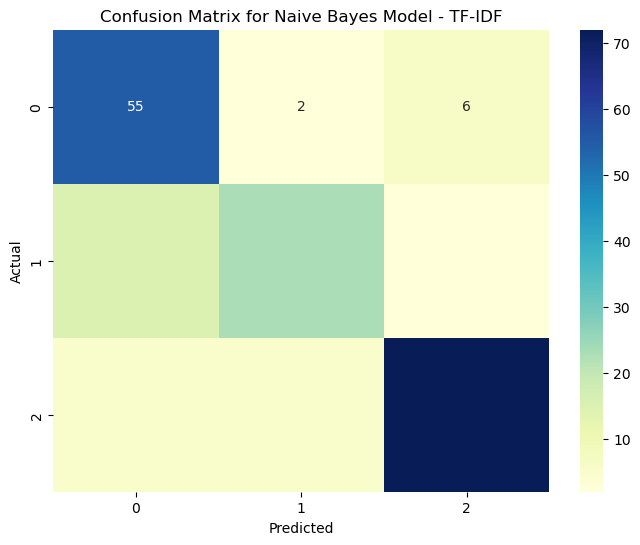

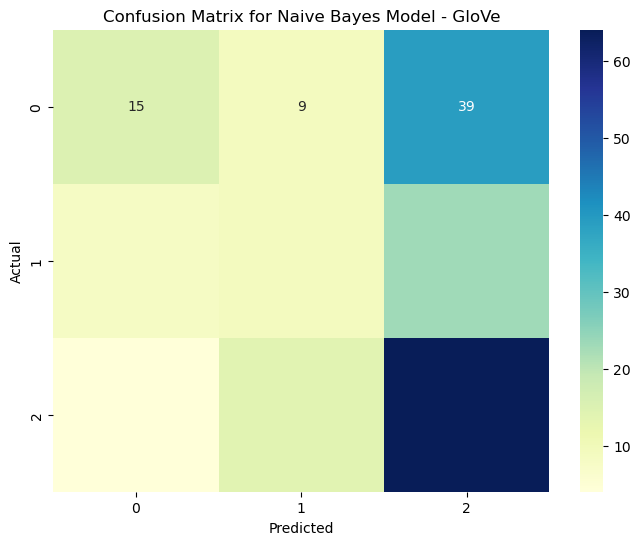

In [129]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix for SVM
cm_nb_tfidf = confusion_matrix(y_test, nb_predictions_tfidf)
# cm_nb_w2v   = confusion_matrix(y_test, nb_predictions_w2v)
cm_nb_glo   = confusion_matrix(y_test, nb_predictions_glo)

# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb_tfidf, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes Model - TF-IDF')
plt.show()

# Plot the confusion matrix for SVM
# plt.figure(figsize=(8, 6))
# # sns.heatmap(cm_nb_w2v, annot=True, fmt='d', cmap="YlGnBu")
# # plt.xlabel('Predicted')
# # plt.ylabel('Actual')
# # plt.title('Confusion Matrix for Naive Bayes Model - W2V')
# # plt.show()

# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb_glo, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes Model - GloVe')
plt.show()



# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">K-NN</p>

## finding the best params

In [130]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Create k-NN classifier
knn = KNeighborsClassifier()

grid_search_tfidf_temp = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
# grid_search_w2v_temp   = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search_glo_temp   = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search_tfidf = grid_search_tfidf_temp.fit(x_train_tfidf, y_train)
# grid_search_w2v   = grid_search_w2v_temp.fit(x_train_w2v, y_train)
grid_search_glo   = grid_search_glo_temp.fit(x_train_glo, y_train)

# Get the best parameters
best_params_tfidf = grid_search_tfidf.best_params_
# best_params_w2v   = grid_search_w2v.best_params_
best_params_glo   = grid_search_glo.best_params_


print("Best Parameters for TF-IDF :", best_params_tfidf)
# print("Best Parameters for W2V    :", best_params_w2v)
print("Best Parameters for GloVe  :", best_params_glo)

Best Parameters for TF-IDF : {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Best Parameters for GloVe  : {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}


In [131]:
# Use the best model to make predictions
knn_tfidf   = KNeighborsClassifier(**best_params_tfidf)
# knn_w2v     = KNeighborsClassifier(**best_params_w2v)
knn_glo     = KNeighborsClassifier(**best_params_glo)

knn_tfidf.fit(x_train_tfidf, y_train)
# knn_w2v.fit(x_train_w2v, y_train)
knn_glo.fit(x_train_glo, y_train)

knn_predictions_tfidf = knn_tfidf.predict(x_test_tfidf)
# knn_predictions_w2v   = knn_w2v.predict(x_test_w2v)
knn_predictions_glo   = knn_glo.predict(x_test_glo)


In [132]:
# Calculate performance metrics for SVM
accuracy_knn_tfidf  = accuracy_score(y_test, knn_predictions_tfidf)
precision_knn_tfidf = precision_score(y_test, knn_predictions_tfidf, average='micro')
recall_knn_tfidf    = recall_score(y_test, knn_predictions_tfidf, average='micro')
f1_knn_tfidf         = f1_score(y_test, knn_predictions_tfidf, average='micro')

# accuracy_knn_w2v  = accuracy_score(y_test, knn_predictions_w2v)
# precision_knn_w2v = precision_score(y_test, knn_predictions_w2v, average='micro')
# recall_knn_w2v    = recall_score(y_test, knn_predictions_w2v, average='micro')
# f1_knn_w2v        = f1_score(y_test, knn_predictions_w2v, average='micro')

accuracy_knn_glo = accuracy_score(y_test, knn_predictions_glo)
precision_knn_glo = precision_score(y_test, knn_predictions_glo, average='micro')
recall_knn_glo = recall_score(y_test, knn_predictions_glo, average='micro')
f1_knn_glo = f1_score(y_test, knn_predictions_glo, average='micro')

print('KNN Model Metrics - TF-IDF:')
print('Accuracy  : {:.2f} %'.format(accuracy_knn_tfidf * 100))
print('Precision : {:.2f} %'.format(precision_knn_tfidf * 100))
print('Recall    : {:.2f} %'.format(recall_knn_tfidf * 100))
print('F1 Score  : {:.2f} %'.format(f1_knn_tfidf * 100))
print('')
# print('KNN Model Metrics - W2V:')
# print('Accuracy  : {:.2f} %'.format(accuracy_knn_w2v * 100))
# print('Precision : {:.2f} %'.format(precision_knn_w2v * 100))
# print('Recall    : {:.2f} %'.format(recall_knn_w2v * 100))
# print('F1 Score  : {:.2f} %'.format(f1_knn_w2v * 100))
print('')
print('KNN Model Metrics - GloVe:')
print('Accuracy  : {:.2f} %'.format(accuracy_knn_glo * 100))
print('Precision : {:.2f} %'.format(precision_knn_glo * 100))
print('Recall    : {:.2f} %'.format(recall_knn_glo * 100))
print('F1 Score  : {:.2f} %'.format(f1_knn_glo * 100))

KNN Model Metrics - TF-IDF:
Accuracy  : 74.59 %
Precision : 74.59 %
Recall    : 74.59 %
F1 Score  : 74.59 %


KNN Model Metrics - GloVe:
Accuracy  : 59.46 %
Precision : 59.46 %
Recall    : 59.46 %
F1 Score  : 59.46 %


## confusion martrix

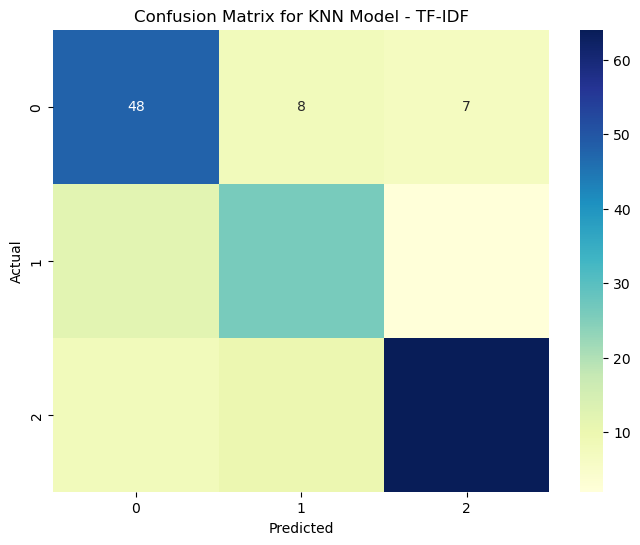

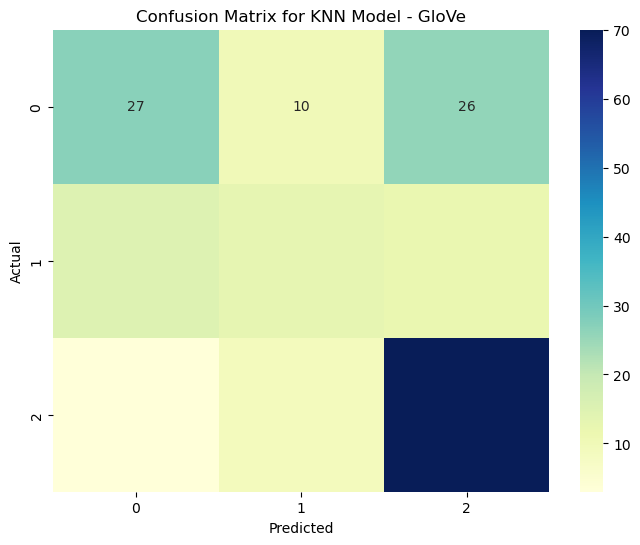

In [133]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix for SVM
cm_nb_tfidf = confusion_matrix(y_test, knn_predictions_tfidf)
# cm_nb_w2v = confusion_matrix(y_test, knn_predictions_w2v)
cm_nb_glo = confusion_matrix(y_test, knn_predictions_glo)

# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb_tfidf, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN Model - TF-IDF')
plt.show()
                             
# # Plot the confusion matrix for SVM
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm_nb_w2v, annot=True, fmt='d', cmap="YlGnBu")
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix for KNN Model - W2V')
# plt.show()
                             
# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb_glo, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN Model - GloVe')
plt.show()                            

## comparision

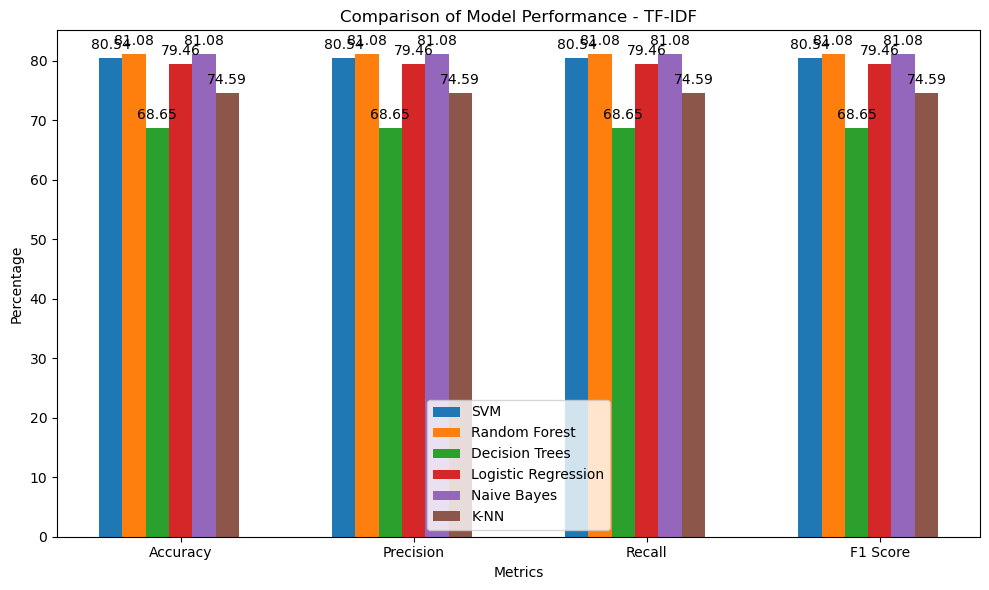

In [134]:
import numpy as np
import matplotlib.pyplot as plt

# Data
X = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
svm_ = [accuracy_svm_tfidf * 100, precision_svm_tfidf * 100, recall_svm_tfidf * 100, f1_svm_tfidf * 100]
rf_ = [accuracy_rf_tfidf * 100, precision_rf_tfidf * 100, recall_rf_tfidf * 100, f1_rf_tfidf * 100]
dt_ = [accuracy_dt_tfidf * 100, precision_dt_tfidf * 100, recall_dt_tfidf * 100, f1_dt_tfidf * 100]
lr_ = [accuracy_lr_tfidf * 100, precision_lr_tfidf * 100, recall_lr_tfidf * 100, f1_lr_tfidf * 100]
nb_ = [accuracy_nb_tfidf * 100, precision_nb_tfidf * 100, recall_nb_tfidf * 100, f1_nb_tfidf * 100]
knn_ = [accuracy_knn_tfidf * 100, precision_knn_tfidf * 100, recall_knn_tfidf * 100, f1_knn_tfidf * 100]

# Bar width and positions
X_axis = np.arange(len(X))
bar_width = 0.1
bar_positions = [X_axis - 0.3, X_axis - 0.2, X_axis - 0.1, X_axis, X_axis + 0.1, X_axis + 0.2]

# Plotting
plt.figure(figsize=(10, 6))
for i, (model, values) in enumerate(zip(['SVM', 'Random Forest', 'Decision Trees', 'Logistic Regression', 'Naive Bayes', 'K-NN'],
                                         [svm_, rf_, dt_, lr_, nb_, knn_])):
    plt.bar(bar_positions[i], values, bar_width, label=model)
    for x, y in zip(bar_positions[i], values):
        plt.text(x, y + 1, '{:.2f}'.format(y), ha='center', va='bottom')

plt.xticks(X_axis, X)
plt.xlabel("Metrics")
plt.ylabel("Percentage")
plt.title("Comparison of Model Performance - TF-IDF")
plt.legend()
plt.tight_layout()
plt.show()


In [135]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Data
# X = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
# svm_ = [accuracy_svm_w2v * 100, precision_svm_w2v * 100, recall_svm_w2v * 100, f1_svm_w2v * 100]
# rf_ = [accuracy_rf_w2v * 100, precision_rf_w2v * 100, recall_rf_w2v * 100, f1_rf_w2v * 100]
# dt_ = [accuracy_dt_w2v * 100, precision_dt_w2v * 100, recall_dt_w2v * 100, f1_dt_w2v * 100]
# lr_ = [accuracy_lr_w2v * 100, precision_lr_w2v * 100, recall_lr_w2v * 100, f1_lr_w2v * 100]
# nb_ = [accuracy_nb_w2v * 100, precision_nb_w2v * 100, recall_nb_w2v * 100, f1_nb_w2v * 100]
# knn_ = [accuracy_knn_w2v * 100, precision_knn_w2v * 100, recall_knn_w2v * 100, f1_knn_w2v * 100]

# # Bar width and positions
# X_axis = np.arange(len(X))
# bar_width = 0.1
# bar_positions = [X_axis - 0.3, X_axis - 0.2, X_axis - 0.1, X_axis, X_axis + 0.1, X_axis + 0.2]

# # Plotting
# plt.figure(figsize=(10, 6))
# for i, (model, values) in enumerate(zip(['SVM', 'Random Forest', 'Decision Trees', 'Logistic Regression', 'Naive Bayes', 'K-NN'],
#                                          [svm_, rf_, dt_, lr_, nb_, knn_])):
#     plt.bar(bar_positions[i], values, bar_width, label=model)
#     for x, y in zip(bar_positions[i], values):
#         plt.text(x, y + 1, '{:.2f}'.format(y), ha='center', va='bottom')

# plt.xticks(X_axis, X)
# plt.xlabel("Metrics")
# plt.ylabel("Percentage")
# plt.title("Comparison of Model Performance - W2V")
# plt.legend()
# plt.tight_layout()
# plt.show()


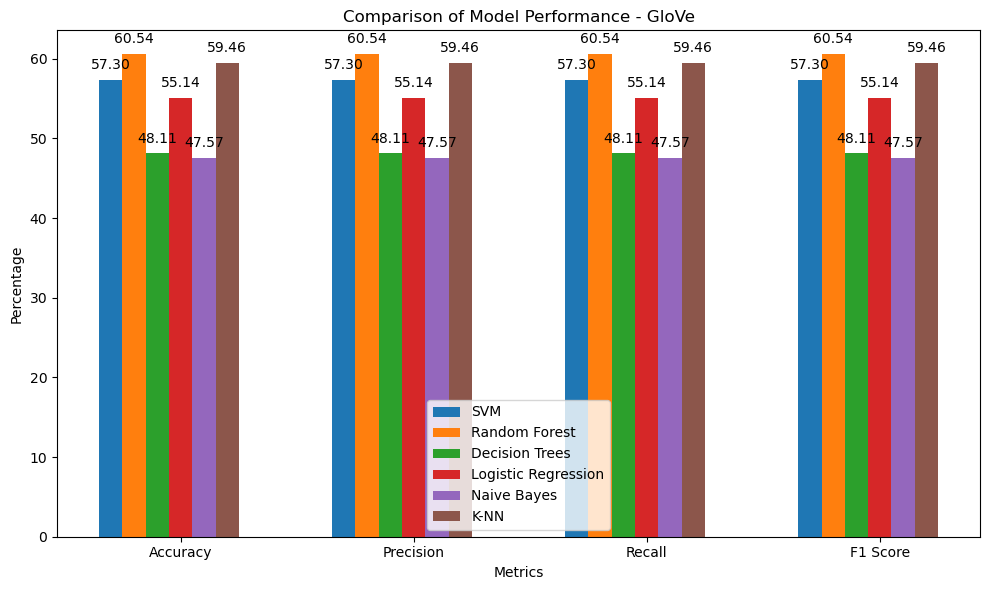

In [136]:
import numpy as np
import matplotlib.pyplot as plt

# Data
X = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
svm_ = [accuracy_svm_glo * 100, precision_svm_glo * 100, recall_svm_glo * 100, f1_svm_glo * 100]
rf_ = [accuracy_rf_glo * 100, precision_rf_glo * 100, recall_rf_glo * 100, f1_rf_glo * 100]
dt_ = [accuracy_dt_glo * 100, precision_dt_glo * 100, recall_dt_glo * 100, f1_dt_glo * 100]
lr_ = [accuracy_lr_glo * 100, precision_lr_glo * 100, recall_lr_glo * 100, f1_lr_glo * 100]
nb_ = [accuracy_nb_glo * 100, precision_nb_glo * 100, recall_nb_glo * 100, f1_nb_glo * 100]
knn_ = [accuracy_knn_glo * 100, precision_knn_glo * 100, recall_knn_glo * 100, f1_knn_glo * 100]

# Bar width and positions
X_axis = np.arange(len(X))
bar_width = 0.1
bar_positions = [X_axis - 0.3, X_axis - 0.2, X_axis - 0.1, X_axis, X_axis + 0.1, X_axis + 0.2]

# Plotting
plt.figure(figsize=(10, 6))
for i, (model, values) in enumerate(zip(['SVM', 'Random Forest', 'Decision Trees', 'Logistic Regression', 'Naive Bayes', 'K-NN'],
                                         [svm_, rf_, dt_, lr_, nb_, knn_])):
    plt.bar(bar_positions[i], values, bar_width, label=model)
    for x, y in zip(bar_positions[i], values):
        plt.text(x, y + 1, '{:.2f}'.format(y), ha='center', va='bottom')

plt.xticks(X_axis, X)
plt.xlabel("Metrics")
plt.ylabel("Percentage")
plt.title("Comparison of Model Performance - GloVe")
plt.legend()
plt.tight_layout()
plt.show()


In [141]:
import joblib
# Save the trained model to a .pkl file
joblib.dump(rf_classifier_tfidf, 'rf_classifier_tfidf.pkl')



['rf_classifier_tfidf.pkl']

In [142]:

joblib.dump(nb_tfidf, 'nb_classifier_tfidf.pkl')

['nb_classifier_tfidf.pkl']


# <p style="padding:10px;background-color:gold;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:300">Unsupervised Learning</p>

## use brain

In [145]:
from itertools import permutations

# Define the numbers
numbers = [2, 1, 0]

# Generate all permutations
perms = permutations(numbers)

# Print the permutations
for perm in perms:
    print(perm)

(2, 1, 0)
(2, 0, 1)
(1, 2, 0)
(1, 0, 2)
(0, 2, 1)
(0, 1, 2)


In [279]:
# try all combination of 2,1,0 then find the highest score with confusion matrix
def SR_combination_1_(rating):
    if rating == 'Negative':
        return 2
    elif rating ==  'Neutral':
        return 1
    elif rating ==  'Positive':
        return 0
    else:
        return (-1)  

In [280]:
def SR_combination_2_(rating):
    if rating == 'Negative':
        return 2
    elif rating == 'Neutral':
        return 0
    elif rating == 'Positive':
        return 1
    else:
        return (-1) 

In [281]:
def SR_combination_3_(rating):
    if rating == 'Negative':
        return 1
    elif rating == 'Neutral':
        return 2
    elif rating == 'Positive':
        return 0
    else:
        return (-1) 

In [282]:
def SR_combination_4_(rating):
    if rating == 'Negative':
        return 1
    elif rating == 'Neutral':
        return 0
    elif rating == 'Positive':
        return 2
    else:
        return (-1) 

In [283]:
def SR_combination_5_(rating):
    if rating == 'Negative':
        return 0
    elif rating == 'Neutral':
        return 2
    elif rating == 'Positive':
        return 1
    else:
        return (-1) 

In [284]:
def SR_combination_6_(rating):
    if rating == 'Negative':
        return 0
    elif rating == 'Neutral':
        return 1
    elif rating == 'Positive':
        return 2
    else:
        return (-1)  

## application of PCA

In [287]:
df_cluster = pd.read_csv('Contraction Review & Sentiment Rating.csv')

In [288]:
df_cluster['SR_combination_1'] = df_cluster['Sentiment_Rating'].apply(SR_combination_1_)
df_cluster['SR_combination_2'] = df_cluster['Sentiment_Rating'].apply(SR_combination_2_)
df_cluster['SR_combination_3'] = df_cluster['Sentiment_Rating'].apply(SR_combination_3_)
df_cluster['SR_combination_4'] = df_cluster['Sentiment_Rating'].apply(SR_combination_4_)
df_cluster['SR_combination_5'] = df_cluster['Sentiment_Rating'].apply(SR_combination_5_)
df_cluster['SR_combination_6'] = df_cluster['Sentiment_Rating'].apply(SR_combination_6_)

In [289]:
df_cluster.columns

Index(['lemma_text', 'Sentiment_Rating', 'SR_combination_1',
       'SR_combination_2', 'SR_combination_3', 'SR_combination_4',
       'SR_combination_5', 'SR_combination_6'],
      dtype='object')

In [290]:
df_cluster

,lemma_text,Sentiment_Rating,SR_combination_1,SR_combination_2,SR_combination_3,SR_combination_4,SR_combination_5,SR_combination_6
0,Baju kurta Sampai Dalam Keadaan Baik Tapi Tari...,Neutral,1,0,2,0,2,1
1,SIZING TINDA Tepat Langsung Aku Rasa Macam Baj...,Negative,2,2,1,1,0,0
2,Baju kurta saya dah koyak Sebelum pakai memang...,Negative,2,2,1,1,0,0
3,Penghantaran Laju Kain Cantik Terima kasih Pen...,Positive,0,1,0,2,1,2
4,Baju Selamat Mendarat Kain Cantik Dan Sedap Di...,Positive,0,1,0,2,1,2
...,...,...,...,...,...,...,...,...
1843,Ons the shirt there is a red tried to wash still,Neutral,1,0,2,0,2,1
1844,The color is slightly different from the pictu...,Negative,2,2,1,1,0,0
1845,The color of our nude asks for another color t...,Negative,2,2,1,1,0,0
1846,Reject following the size I want,Positive,0,1,0,2,1,2


In [291]:
df_cluster = df_cluster.dropna(subset=['lemma_text'])
df_cluster

,lemma_text,Sentiment_Rating,SR_combination_1,SR_combination_2,SR_combination_3,SR_combination_4,SR_combination_5,SR_combination_6
0,Baju kurta Sampai Dalam Keadaan Baik Tapi Tari...,Neutral,1,0,2,0,2,1
1,SIZING TINDA Tepat Langsung Aku Rasa Macam Baj...,Negative,2,2,1,1,0,0
2,Baju kurta saya dah koyak Sebelum pakai memang...,Negative,2,2,1,1,0,0
3,Penghantaran Laju Kain Cantik Terima kasih Pen...,Positive,0,1,0,2,1,2
4,Baju Selamat Mendarat Kain Cantik Dan Sedap Di...,Positive,0,1,0,2,1,2
...,...,...,...,...,...,...,...,...
1843,Ons the shirt there is a red tried to wash still,Neutral,1,0,2,0,2,1
1844,The color is slightly different from the pictu...,Negative,2,2,1,1,0,0
1845,The color of our nude asks for another color t...,Negative,2,2,1,1,0,0
1846,Reject following the size I want,Positive,0,1,0,2,1,2


In [292]:
df_cluster['lemma_text'].fillna('', inplace=True)
df_cluster

,lemma_text,Sentiment_Rating,SR_combination_1,SR_combination_2,SR_combination_3,SR_combination_4,SR_combination_5,SR_combination_6
0,Baju kurta Sampai Dalam Keadaan Baik Tapi Tari...,Neutral,1,0,2,0,2,1
1,SIZING TINDA Tepat Langsung Aku Rasa Macam Baj...,Negative,2,2,1,1,0,0
2,Baju kurta saya dah koyak Sebelum pakai memang...,Negative,2,2,1,1,0,0
3,Penghantaran Laju Kain Cantik Terima kasih Pen...,Positive,0,1,0,2,1,2
4,Baju Selamat Mendarat Kain Cantik Dan Sedap Di...,Positive,0,1,0,2,1,2
...,...,...,...,...,...,...,...,...
1843,Ons the shirt there is a red tried to wash still,Neutral,1,0,2,0,2,1
1844,The color is slightly different from the pictu...,Negative,2,2,1,1,0,0
1845,The color of our nude asks for another color t...,Negative,2,2,1,1,0,0
1846,Reject following the size I want,Positive,0,1,0,2,1,2


In [293]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_cluster['lemma_text'])

In [294]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

## Elbow Method

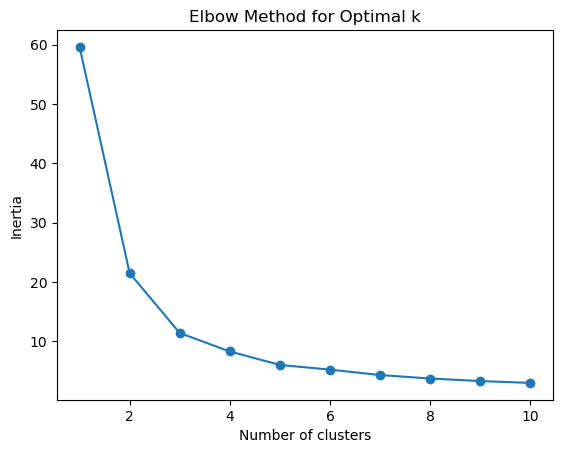

In [298]:
import matplotlib.pyplot as plt

# Assuming 'X' is your data and 'pca_result' is the transformed data using PCA
inertia = []
k_max = 10  # Maximum number of clusters to consider

for k in range(1, k_max + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_result)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, k_max + 1), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

plt.show()


## K-means


In [312]:
from sklearn.cluster import KMeans

# Step 4: Apply Clustering Algorithm
kmeans = KMeans(n_clusters=3)  # Specify the number of clusters
kmeans.fit(tfidf_matrix)
cluster_labels = kmeans.labels_

df_cluster['knn_cluster_label'] = cluster_labels
print(df_cluster['cluster_label'].value_counts())

cluster_label
2    461
1    253
0    210
Name: count, dtype: int64


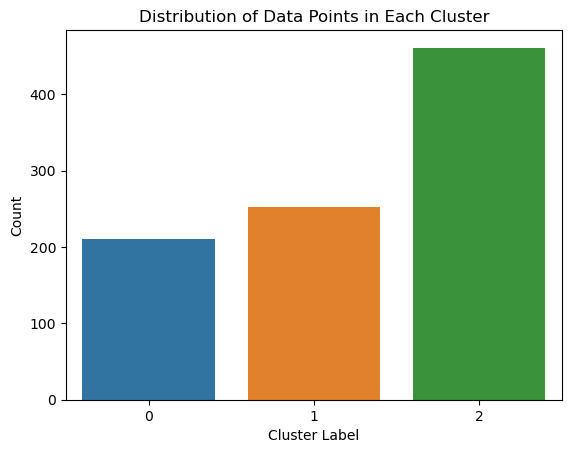

In [313]:
# Alternatively, you can visualize the distribution of data points in each cluster
import seaborn as sns
sns.countplot(x='cluster_label', data=df_cluster)
plt.title('Distribution of Data Points in Each Cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.show()


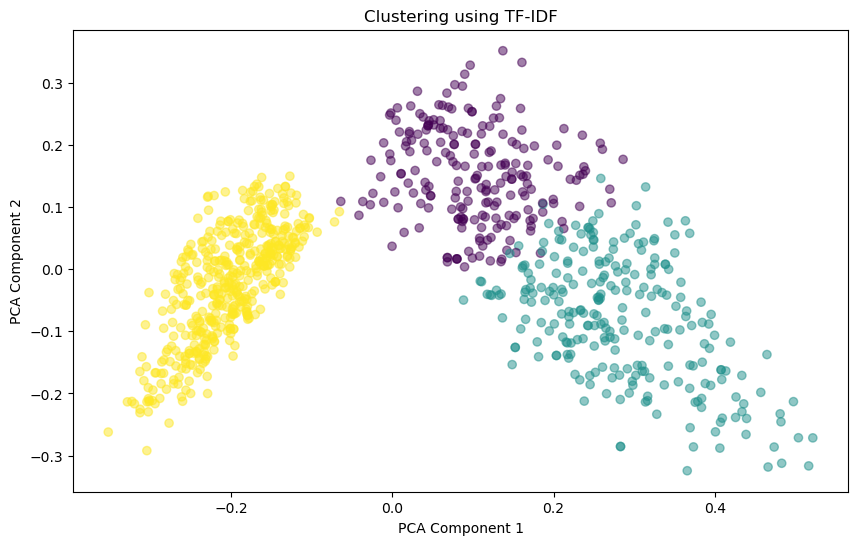

In [311]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensionality of TF-IDF matrix using PCA
pca = PCA(n_components=2)
tfidf_matrix_pca = pca.fit_transform(tfidf_matrix.toarray())

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(tfidf_matrix_pca[:, 0], tfidf_matrix_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o', alpha=0.5)
plt.title('KMeans Clustering of TF-IDF Matrix')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


## interpret the result

SR Combination 1 :
Accuracy  : 38.31 %
Precision : 39.96 %
Recall    : 38.64 %
F1-score  : 37.87 %

SR Combination 2 :
Accuracy  : 27.92 %
Precision : 26.82 %
Recall    : 28.11 %
F1-score  : 26.09 %

SR Combination 3 :
Accuracy  : 33.66 %
Precision : 36.21 %
Recall    : 35.11 %
F1-score  : 33.22 %

SR Combination 4 :
Accuracy  : 32.90 %
Precision : 29.90 %
Recall    : 29.71 %
F1-score  : 29.50 %

SR Combination 5 :
Accuracy  : 28.79 %
Precision : 30.14 %
Recall    : 31.65 %
F1-score  : 28.64 %

SR Combination 6 :
Accuracy  : 38.42 %
Precision : 36.97 %
Recall    : 36.79 %
F1-score  : 36.70 %

The highest accuracy is SR combination 6
Accuracy  : 38.42 %
Precision : 36.97 %
Recall    : 36.79 %
F1-score  : 36.70 %



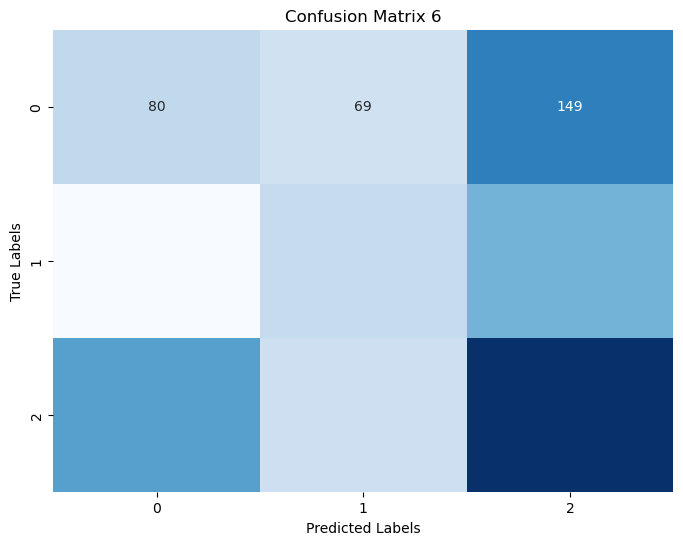

In [301]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

temp =0
# Create confusion matrix
for i in range(1,7):
    
    y_actual = finalData['SR_combination_' + str(i)]
    y_predict = finalData['knn_cluster_label']

    cm = confusion_matrix(y_actual, y_predict)
    conf_matrix = np.array(cm)

    # Calculate accuracy
    accuracy = accuracy_score(y_actual, y_predict)

    # Calculate precision
    precision = precision_score(y_actual, y_predict, average='macro')

    # Calculate recall
    recall = recall_score(y_actual, y_predict, average='macro')

    # Calculate F1-score
    f1 = f1_score(y_actual, y_predict, average='macro')

    print(f"SR Combination {str(i)} :")
    print('Accuracy  : {:.2f} %'.format(accuracy * 100))
    print('Precision : {:.2f} %'.format(precision * 100))
    print('Recall    : {:.2f} %'.format(recall * 100))
    print('F1-score  : {:.2f} %'.format(f1 * 100))
    print("")
    
    if(temp < accuracy):
        temp = accuracy
        temp_cm = cm
        temp_noc = i
        temp_accuracy = accuracy
        temp_precision = precision
        temp_recall = recall
        temp_f1 = f1
    
    
 #Plot confusion matrix
print('===========================================================================')
print('The highest accuracy is SR combination ' + str(temp_noc))
print('Accuracy  : {:.2f} %'.format(temp_accuracy * 100))
print('Precision : {:.2f} %'.format(temp_precision * 100))
print('Recall    : {:.2f} %'.format(temp_recall * 100))
print('F1-score  : {:.2f} %'.format(temp_f1 * 100))
print("")

plt.figure(figsize=(8, 6))
sns.heatmap(temp_cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix '  + str(temp_noc) )
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Agglomerative

In [306]:
from sklearn.cluster import AgglomerativeClustering

# Define the number of clusters (optional, you can also let the model determine the optimal number of clusters)
n_clusters = 3

# Initialize the Agglomerative clustering model
agg_clustering_tfidf = AgglomerativeClustering(n_clusters=n_clusters)
agg_clustering_w2v = AgglomerativeClustering(n_clusters=n_clusters)

# Fit the model to your data
agg_clustering_tfidf = agg_clustering_tfidf.fit(pca_result_tfidf)


In [305]:
# Get cluster labels
agg_cluster_labels_tfidf = agg_clustering_tfidf.labels_


# Print the cluster labels for each data point
print("Cluster Labels:")
print(agg_cluster_labels_tfidf)



Cluster Labels:
[2 2 2 ... 0 0 0]


In [185]:
# save as a column
finalData['aggg_cluster_label_tfidf'] = agg_clustering_tfidf.labels_
finalData['aggg_cluster_label_w2v'] = agg_clustering_w2v.labels_

## scatter plot

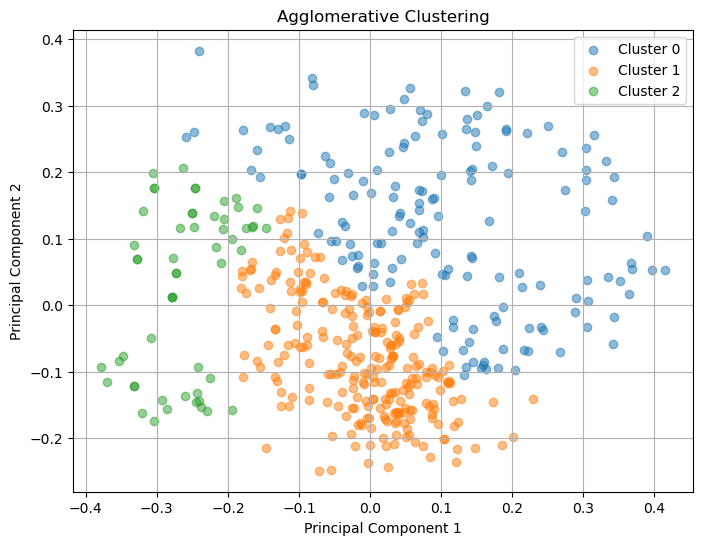

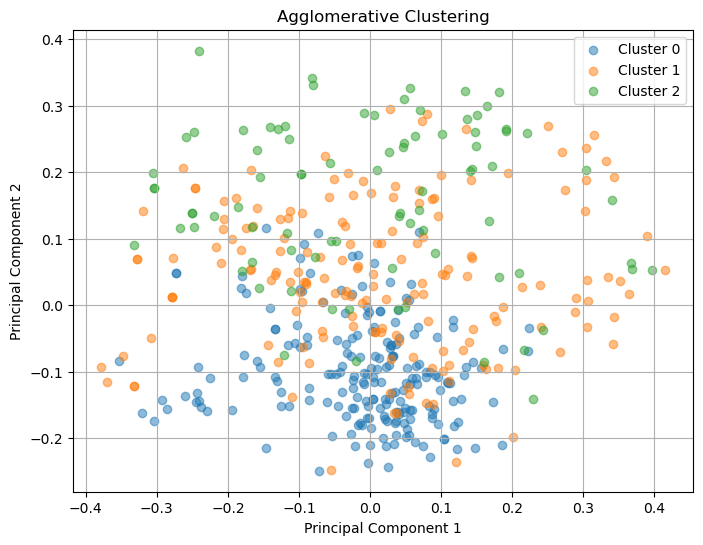

In [186]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.figure(figsize=(8, 6))
for label in set(agg_clustering_tfidf.labels_):
    cluster_points = pca_result[agg_clustering_tfidf.labels_ == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}', cmap='viridis', marker='o', alpha=0.5)

plt.title('Agglomerative Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


# Plot the clusters
plt.figure(figsize=(8, 6))
for label in set(agg_clustering_w2v.labels_):
    cluster_points = pca_result[agg_clustering_w2v.labels_ == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}', cmap='viridis', marker='o', alpha=0.5)

plt.title('Agglomerative Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


## interpret the result

SR Combination 1 :
Accuracy  : 31.17 %
Precision : 46.67 %
Recall    : 31.44 %
F1-score  : 33.54 %

SR Combination 2 :
Accuracy  : 55.84 %
Precision : 62.66 %
Recall    : 54.66 %
F1-score  : 53.73 %

SR Combination 3 :
Accuracy  : 30.52 %
Precision : 26.85 %
Recall    : 28.71 %
F1-score  : 26.34 %

SR Combination 4 :
Accuracy  : 31.39 %
Precision : 24.97 %
Recall    : 37.25 %
F1-score  : 29.82 %

SR Combination 5 :
Accuracy  : 37.45 %
Precision : 28.35 %
Recall    : 31.31 %
F1-score  : 29.16 %

SR Combination 6 :
Accuracy  : 13.64 %
Precision : 10.49 %
Recall    : 16.64 %
F1-score  : 12.44 %

The highest accuracy is SR combination 2
Accuracy  : 55.84 %
Precision : 62.66 %
Recall    : 54.66 %
F1-score  : 53.73 %



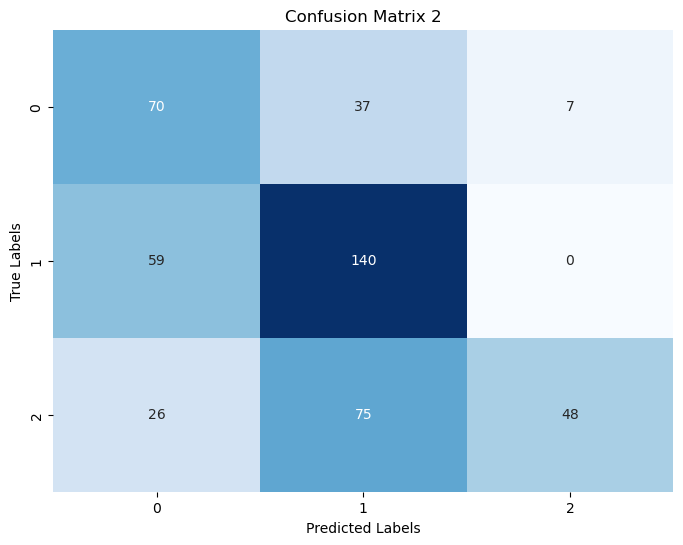

In [187]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



temp =0
# Create confusion matrix
for i in range(1,7):
    
    y_actual = finalData['SR_combination_' + str(i)]
    y_predict = finalData['aggg_cluster_label_tfidf']

    cm = confusion_matrix(y_actual, y_predict)
    conf_matrix = np.array(cm)

    # Calculate accuracy
    accuracy = accuracy_score(y_actual, y_predict)

    # Calculate precision
    precision = precision_score(y_actual, y_predict, average='macro')

    # Calculate recall
    recall = recall_score(y_actual, y_predict, average='macro')

    # Calculate F1-score
    f1 = f1_score(y_actual, y_predict, average='macro')

    print(f"SR Combination {str(i)} :")
    print('Accuracy  : {:.2f} %'.format(accuracy * 100))
    print('Precision : {:.2f} %'.format(precision * 100))
    print('Recall    : {:.2f} %'.format(recall * 100))
    print('F1-score  : {:.2f} %'.format(f1 * 100))
    print("")
    
    if(temp < accuracy):
        temp = accuracy
        temp_cm = cm
        temp_noc = i
        temp_accuracy = accuracy
        temp_precision = precision
        temp_recall = recall
        temp_f1 = f1
    
    
 #Plot confusion matrix
print('===========================================================================')
print('The highest accuracy is SR combination ' + str(temp_noc))
print('Accuracy  : {:.2f} %'.format(temp_accuracy * 100))
print('Precision : {:.2f} %'.format(temp_precision * 100))
print('Recall    : {:.2f} %'.format(temp_recall * 100))
print('F1-score  : {:.2f} %'.format(temp_f1 * 100))
print("")

plt.figure(figsize=(8, 6))
sns.heatmap(temp_cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix '  + str(temp_noc) )
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Spectral

In [188]:
from sklearn.cluster import SpectralClustering

# Create Spectral clustering model
spectral_clustering_tfidf = SpectralClustering(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed

# Fit the model to your data
spectral_clustering_tfidf.fit(pca_result_tfidf)

# Get the cluster labels
cluster_labels_tfidf = spectral_clustering_tfidf.labels_
cluster_labels_w2v = spectral_clustering_w2v.labels_

# Print the cluster labels for each data point
print("Cluster Labels:")
print(cluster_labels_tfidf)

print("Cluster Labels:")
print(cluster_labels_w2v)

Cluster Labels:
[2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 0 1
 0 2 1 1 1 1 0 1 2 2 0 1 0 1 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 0 1 2 1 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 0 1
 2 2 2 0 0 0 2 0 1 0 1 0 1 1 2 2 2 0 1 0 2 1 1 0 1 0 1 2 2 0 1 0 1 2 2 1 2
 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 2 2
 2 2 1 2 2 2 2 2 2 2 2 1 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1
 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1]
Cluster Labels:
[2 1 2 1 1 1 0 1 1 1 1 0 1 1 0

In [189]:
# save as a column
finalData['spec_cluster_label_tfidf'] = spectral_clustering_tfidf.labels_
finalData['spec_cluster_label_w2v'] = spectral_clustering_w2v.labels_

## scatter plot

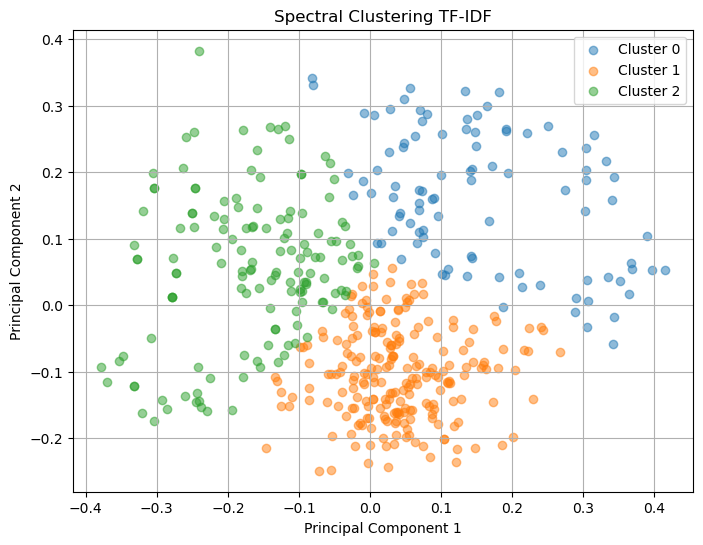

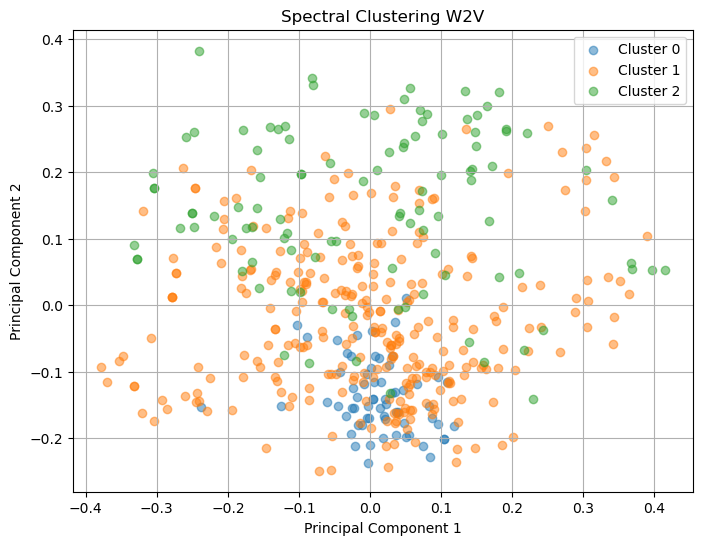

In [190]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.figure(figsize=(8, 6))
for label in set(spectral_clustering_tfidf.labels_):
    cluster_points = pca_result[spectral_clustering_tfidf.labels_ == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}', cmap='viridis', marker='o', alpha=0.5)

plt.title('Spectral Clustering TF-IDF')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


# Plot the clusters
plt.figure(figsize=(8, 6))
for label in set(spectral_clustering_w2v.labels_):
    cluster_points = pca_result[spectral_clustering_w2v.labels_ == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}', cmap='viridis', marker='o', alpha=0.5)

plt.title('Spectral Clustering W2V')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


## interpret the result

SR Combination 1 :
Accuracy  : 37.01 %
Precision : 40.77 %
Recall    : 38.77 %
F1-score  : 38.06 %

SR Combination 2 :
Accuracy  : 70.78 %
Precision : 68.94 %
Recall    : 67.77 %
F1-score  : 68.12 %

SR Combination 3 :
Accuracy  : 18.61 %
Precision : 21.07 %
Recall    : 19.41 %
F1-score  : 18.99 %

SR Combination 4 :
Accuracy  : 19.48 %
Precision : 24.82 %
Recall    : 23.57 %
F1-score  : 23.82 %

SR Combination 5 :
Accuracy  : 43.51 %
Precision : 34.41 %
Recall    : 37.66 %
F1-score  : 35.71 %

SR Combination 6 :
Accuracy  : 10.61 %
Precision : 9.99 %
Recall    : 12.82 %
F1-score  : 10.48 %

The highest accuracy is SR combination 2
Accuracy  : 70.78 %
Precision : 68.94 %
Recall    : 67.77 %
F1-score  : 68.12 %



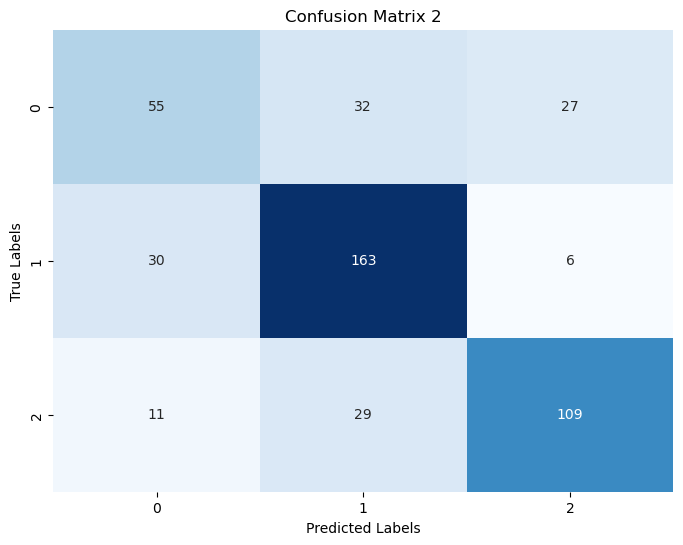

In [191]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

temp =0
# Create confusion matrix
for i in range(1,7):
    
    y_actual = finalData['SR_combination_' + str(i)]
    y_predict = finalData['spec_cluster_label_tfidf']

    cm = confusion_matrix(y_actual, y_predict)
    conf_matrix = np.array(cm)

    # Calculate accuracy
    accuracy = accuracy_score(y_actual, y_predict)

    # Calculate precision
    precision = precision_score(y_actual, y_predict, average='macro')

    # Calculate recall
    recall = recall_score(y_actual, y_predict, average='macro')

    # Calculate F1-score
    f1 = f1_score(y_actual, y_predict, average='macro')

    print(f"SR Combination {str(i)} :")
    print('Accuracy  : {:.2f} %'.format(accuracy * 100))
    print('Precision : {:.2f} %'.format(precision * 100))
    print('Recall    : {:.2f} %'.format(recall * 100))
    print('F1-score  : {:.2f} %'.format(f1 * 100))
    print("")
    
    if(temp < accuracy):
        temp = accuracy
        temp_cm = cm
        temp_noc = i
        temp_accuracy = accuracy
        temp_precision = precision
        temp_recall = recall
        temp_f1 = f1
    
    
 #Plot confusion matrix
print('===========================================================================')
print('The highest accuracy is SR combination ' + str(temp_noc))
print('Accuracy  : {:.2f} %'.format(temp_accuracy * 100))
print('Precision : {:.2f} %'.format(temp_precision * 100))
print('Recall    : {:.2f} %'.format(temp_recall * 100))
print('F1-score  : {:.2f} %'.format(temp_f1 * 100))
print("")

plt.figure(figsize=(8, 6))
sns.heatmap(temp_cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix '  + str(temp_noc) )
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Sentiment Analysis</p>

##### After Model Training, Testing and Evaluation, appropriate sentimer analysis model that effectively handle the Sentiment Reviews & Ratings is --- with highest accuracy of --- %.

## Deployment

In [138]:
def analyze_sentiment():
    review = text_area.get("1.0", "end-1c")

    if review:
        # Translate the review to Malay
        translation = translator.translate(review, dest='ms')
        translated_review = translation.text

        # Vectorize the translated review
        review_vectorized = tfidf_vectorizer.transform([translated_review])

        # Predict sentiment and get probability estimates
        sentiment = rf_classifier_tfidf.predict(review_vectorized)[0]
        confidence = rf_classifier_tfidf.predict_proba(review_vectorized)
        confidence_level = max(confidence[0]) * 100

        # Display the result with color-coded sentiment and confidence level
        if sentiment == 'Positive':
            result_label.config(text=f"It is a {sentiment} review with {confidence_level:.2f}% confidence.", foreground="#4CAF50", font=('Helvetica', 14, 'bold'))
#         elif sentiment == 'Neutral':
            result_label.config(text=f"It is a {sentiment} review with {confidence_level:.2f}% confidence.", foreground="#808080", font=('Helvetica', 14, 'bold'))
        else:
            result_label.config(text=f"It is a {sentiment} review with {confidence_level:.2f}% confidence.", foreground="#FF0000", font=('Helvetica', 14, 'bold'))
    else:
        result_label.config(text="Please enter a review.", foreground="#FF0000", font=('Helvetica', 12, 'italic'))


In [143]:
import tkinter as tk
from tkinter import ttk
from sklearn.feature_extraction.text import TfidfVectorizer
from googletrans import Translator
import joblib

# Load the pre-trained Logistic Regression model
rf_classifier_tfidf = joblib.load('nb_classifier_tfidf.pkl')  # Provide the correct path

# Initialize the translator object
translator = Translator()

# Assuming 'x_train' is your training data
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
x_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Create the main application window
app = tk.Tk()
app.title("Sentiment Analysis")
app.geometry("700x400")  # Set the increased size of the window

# Set the background color to light blue
app.configure(bg='#d8e2eb')

# Create and place widgets with some styling
label = ttk.Label(app, text="Enter Review:", font=('Helvetica', 11, 'bold'), background='#d8e2eb')
label.grid(row=0, column=0, padx=(52, 10), pady=(55,0))

text_area = tk.Text(app, height=5, width=60, font=('Helvetica', 11))
text_area.grid(row=0, column=1, padx=5, pady=(55,0))

analyze_button = ttk.Button(app, text="Analyze", command=analyze_sentiment, style='TButton')
analyze_button.grid(row=1, column=0, columnspan=2, padx=(72, 10),pady=(20,10))

result_label = ttk.Label(app, text="", font=('Helvetica', 11), background='#d8e2eb')
result_label.grid(row=2, column=0, columnspan=2, padx=(73,10),pady=10)

# Add some styling to the button
style = ttk.Style()
style.configure('TButton', font=('Helvetica', 11, 'bold'))

# Run the application
app.mainloop()

In [ ]:
# saya not feeling lucky today
# that parcel buruk and x betul
# baju ni okay je pakai